# Group Name : Vibrator
# Group Members: 
### 1. AIT2304037 Chin Jun Ming 
### 2. AIT2304038 Chin Zheng Dong
### 3. AIT2304041 Tan Wai Hong

## 1. Introduction
##### 1.1 This project aims to build some models learned from this course using open face images dataset. Once the model is built, we need to use this model to predict age and gender. In this project, we use various matrix operations to complete all tasks.

## 2. Import library
##### For the beginning, we import all the libraries we will use. Next, we will introduce the various libraries we will use. 
##### 2.1 __Numpy__ is used to perfrom the matrix operations.
##### 2.2 __Matplotlib__ is used for visualization the images (such as experiment, the image after various matrix operations).
##### 2.3 __os__ is used to import the dataset.
##### 2.4 __skimage__ is used to convert the color face images to grayscale images and resize each images to 50 x 50 pixels.
##### 2.5 __sklearn__ is used to split the dataset and calculate the mean square error after the training and testing is completed.

In [1]:
import numpy as np
from numpy import linalg as LA

from matplotlib import pyplot as plt
from matplotlib import image

import os

from skimage import color 
from skimage.transform import rescale

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 3. Initialization text setting for matplotlib visualization

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlecolor'] = 'black'

## 4.  Import dataset

##### 4.1 __image_datasets__ is the name of our dataset filename, __file_names__ is list out all the images directory. In order to successfully import the dataset, we will use for loop to connect to __FaceData\dataset_directory__. 
##### 4.2 We have a variable __img__ used to read the each pictures directory. Since the first of each dataset basename is the age and the second underscore is the gender, we seperate them using __os.path.basename(filename).split__ and append them to the list. 
##### 4.3 After completing this step, we use the __color.rgb2gray__ function to convert the color face images to grayscale images, then using __rescale__ function to resize it to 50x50 pixels and flatten this 50 x 50 pixels image into a one_dimensional(2500) pixel.

In [3]:
image_datasets = "FaceData"
file_names = os.listdir(image_datasets)

faces = []
ages = []
genders = []

for file_name in file_names:
    file_path = os.path.join(image_datasets,file_name)
    img = image.imread(file_path)
    
    ages.append(os.path.basename(file_name).split("_")[0])
    genders.append(os.path.basename(file_name).split("_")[1])
    
    gray_image = color.rgb2gray(img)
    gray_image_rescaled = rescale(gray_image,0.25,anti_aliasing=False)
    
    faces.append(gray_image_rescaled.flatten()) 

 ## 5. Convert the list to numpy array
##### 5.1 In this section, we convert the __faces__, __ages__, and __genders__ dataset we just imported into numpy arrays.  
##### 5.2 During the conversion, we define their types, change the __genders__ data from 0 and 1 to -1 and 1, and normalize the __ages__.

In [4]:
faces2np = np.array(faces).astype(float)
genders2np = np.array(genders).astype(int)*2 -1
ages2np = np.array(ages).astype(float)/100

## 6. Print array shape

In [5]:
print(faces2np.shape)
print(genders2np.shape)
print(ages2np.shape)

(9762, 2500)
(9762,)
(9762,)


## 7. Visualize the faces
##### We use __matplotlib__ and __numpy__ functions to reshape the 12 images, and we can observe that the images have been succesfully converted to gray images and resized to 50 x 50 pixels

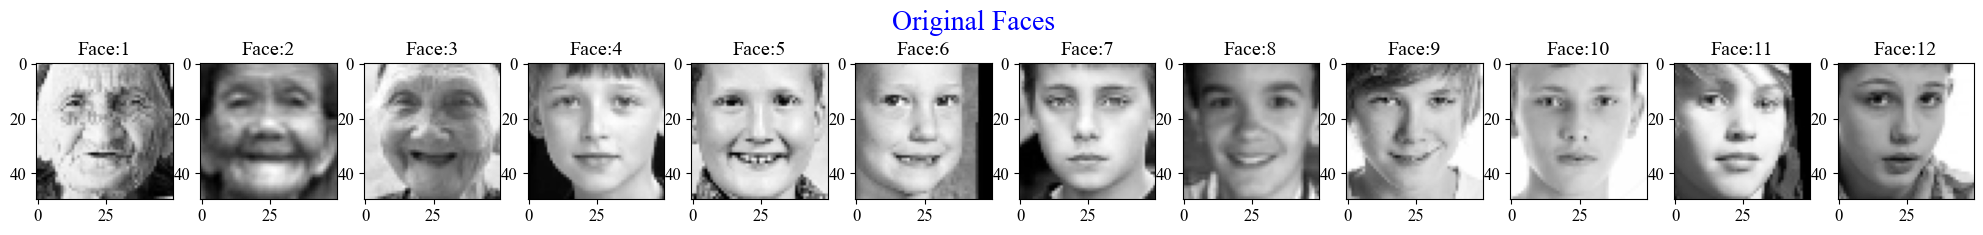

In [6]:
row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(25,2.5))

for i in range(row0):
    ori_im = faces2np[i,:].reshape((50, 50))
    ax[i].imshow(ori_im, cmap='gray')
    ax[i].set_title(f"Face:{i + 1}")
    ax[i].axis('on')

plt.suptitle("Original Faces",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

## 1.5 Split the dataset

##### We use __train_test_split__ split the faces dataset, gender dataset and age dataset into training set and testing set, with the training set accounting for 90% and the testing set accounting for 10%.

In [7]:
X_train, X_test, y_genders_train, y_genders_test, y_ages_train, y_ages_test = train_test_split(faces2np,genders2np,ages2np, test_size=0.1, random_state=205)

## Demean faces training dataset

##### We use the following formula to calculate the faces training set and testing set demean value.

\begin{align}
{X{train}}_{demean} = X{train}- \frac{\sum_{n=1}^{i} X{train}^{(i)}}{n}
\end{align}

In [8]:
X_train_1 = X_train.copy()
X_train_demean = X_train_1 - np.mean(X_train_1,axis=0)

X_test_1 = X_test.copy()
X_test_demean = X_test_1 - np.mean(X_test_1, axis=0)

## Visualize the demean faces

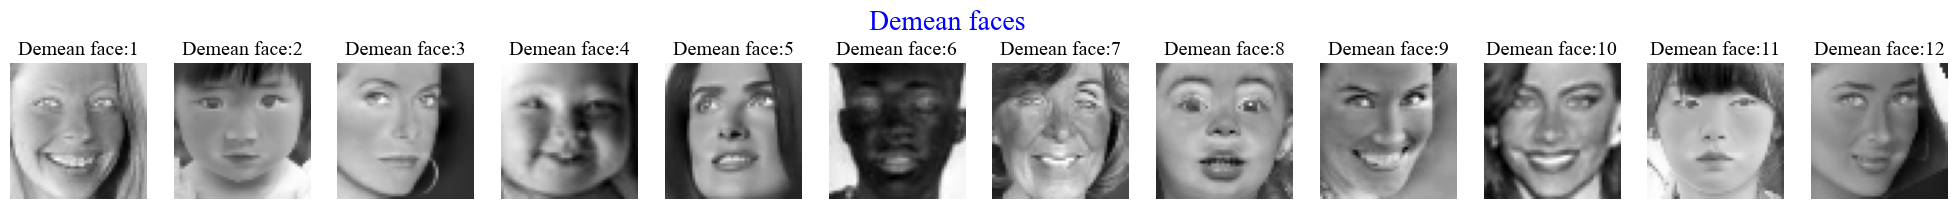

In [9]:
row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(25,2.5))

for i in range(row0):
    demean_im = X_train_demean[i,:].reshape((50, 50))
    ax[i].imshow(demean_im, cmap='gray')
    ax[i].set_title(f"Demean face:{i + 1}")
    ax[i].axis('off')

plt.suptitle("Demean faces", fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

## Covariance Matrix

##### We use the following formula to calculate the faces training set covariance matrix:

\begin{align}
{X{train}}_{cov} = \frac{{X{train}}_{demean}^{T}{X{train}}_{demean}}{n}
\end{align}

In [10]:
X_train_cov = (X_train_demean.T@X_train_demean)/X_train_demean.shape[0]

## Eigendecomposition
##### After calculating the covariance matrix, we use the __np.linalg.eig__ function to perform Eigendecomposition on $X{train}_{cov}$.

In [11]:
X_train_eigenvalue, X_train_eigenvector = np.linalg.eig(X_train_cov.copy())

## Eigendecomposition Result
##### After performing the Eigendecomposition, we get 2 results, the first is __X_train_eigenvalue__ and the second is __X_train_eigenvector__. We will also discuss its properties later.

In [12]:
print(f"X train eigenvalue: {X_train_eigenvalue}")
print(f"X train eigenvector: {X_train_eigenvector}")

X train eigenvalue: [3.40378176e+01 1.37234326e+01 1.29175653e+01 ... 1.26367062e-04
 1.24778007e-04 1.24649300e-04]
X train eigenvector: [[ 0.02109512 -0.02077792 -0.00991848 ...  0.00169655 -0.00056453
  -0.00071347]
 [ 0.02177545 -0.02188654 -0.0084613  ...  0.01037992 -0.00464907
   0.00195174]
 [ 0.02246644 -0.02277959 -0.00668609 ... -0.00893985  0.00129503
  -0.00428021]
 ...
 [ 0.02612337  0.0031382  -0.03196089 ... -0.00372005 -0.00047456
   0.00123431]
 [ 0.02603965  0.00223539 -0.03199755 ...  0.00187301  0.00358722
   0.00304918]
 [ 0.02603488  0.00118285 -0.03185448 ... -0.00311391 -0.00256184
  -0.00075791]]


## Visualize Eigendecomposition faces

##### In this section, we visualized a total of 24 images after Eigendecomposition. In this visualization, we select the first 12 and ranged from (0 to 11) * 50 vectors and reshaped them into 50 x 50 eigenfaces from the eigenvectors.

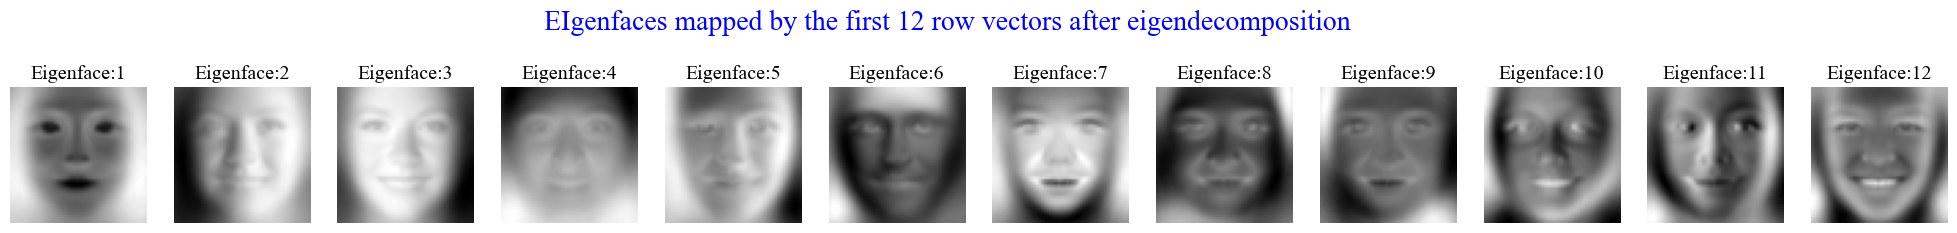

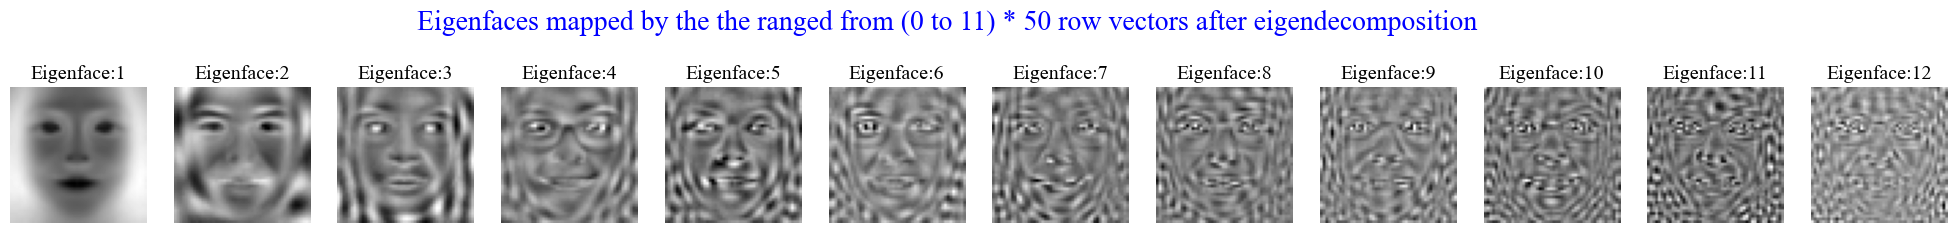

In [13]:
row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(25,3))

for i in range(row0):
    eig_im = X_train_eigenvector[:,i].reshape((50, 50))
    ax[i].imshow(eig_im, cmap='gray')
    ax[i].set_title(f"Eigenface:{i + 1}")
    ax[i].axis('off')

plt.suptitle("EIgenfaces mapped by the first 12 row vectors after eigendecomposition",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(25,3))

for i in range(row0):
    eig_im = X_train_eigenvector[:,i*50].reshape((50, 50))
    ax[i].imshow(eig_im, cmap='gray')
    ax[i].set_title(f"Eigenface:{i + 1}")
    ax[i].axis('off')

plt.suptitle("Eigenfaces mapped by the the ranged from (0 to 11) * 50 row vectors after eigendecomposition",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

## SVD

##### In this section, we use the numpy built-in function __np.linalg.svd__ to perfrom Singular Value Decomposition on the faces training set.

In [14]:
X_train_SVD = X_train.copy()

U_X_train_SVD, sigma_X_train_SVD, VT_X_train_SVD = LA.svd(X_train_SVD)

## SVD Result

##### After we perform SVD, we can observe that the __Xtrain__ matrix is decomposed into the following 3 matrices:

\begin{align}
{X{train}} = U_{X{train}} Σ_{X{train}} V^T_{X_{train}}
\end{align}

##### where U is left singular vectors, $V^T$ is the tranpose of the right singular vector, $Σ$ is singular values. U and V become an orthogonal matrix. After decomposition, U becomes an n x n square matrix, Σ has only singular values, and VT is a d x d square matrix. We will also discuss it properties later.

In [15]:
print(U_X_train_SVD)
print("-------------------------------------------")
print(sigma_X_train_SVD)
print("-------------------------------------------")
print(VT_X_train_SVD)

[[-1.05905195e-02 -4.69653736e-03 -1.82185587e-02 ... -1.99846021e-03
  -6.27781564e-03  3.51542382e-04]
 [-1.01012158e-02 -5.23484187e-03  6.39077191e-03 ...  8.04656034e-03
   1.58809301e-02 -6.47218206e-03]
 [-1.00407971e-02  1.08369331e-02 -3.69015208e-02 ...  2.47741453e-03
   1.34007780e-02 -1.14872323e-02]
 ...
 [-9.38541913e-03  1.07405059e-03 -3.47327890e-03 ...  6.75074724e-01
   4.88216752e-03  5.02551837e-03]
 [-1.27260183e-02 -8.06838148e-03  5.11775289e-03 ...  4.07294258e-03
   5.52777244e-01 -7.39661767e-03]
 [-4.79922367e-03  7.82081862e-03 -2.08010338e-03 ... -3.16832737e-03
   9.50145044e-03  3.40407645e-01]]
-------------------------------------------
[2.49812857e+03 3.74784090e+02 3.45224670e+02 ... 4.08750377e-01
 3.95556844e-01 3.85348485e-01]
-------------------------------------------
[[-0.01462816 -0.01437478 -0.01435444 ... -0.01714029 -0.01717306
  -0.01720271]
 [-0.02511274 -0.0253627  -0.02519905 ... -0.03184237 -0.03213867
  -0.03245728]
 [-0.01239836 -0.

## SVD faces visualize

##### Here we still visualize a total of 24 images using SVD. The eigenfaces after SVD decomposition are $V^T$, so we directly select the $V^T$ column to reshape into eigenfaces. As with the eigendecomposition above, we also select the the first 12 and ranged from (0 to 11) * 50 vectors and reshaped them into 50 x 50 eigenfaces from the $V^T$.

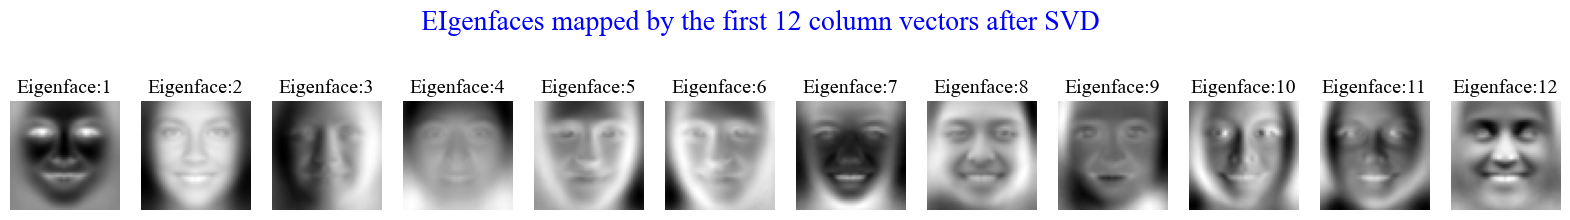

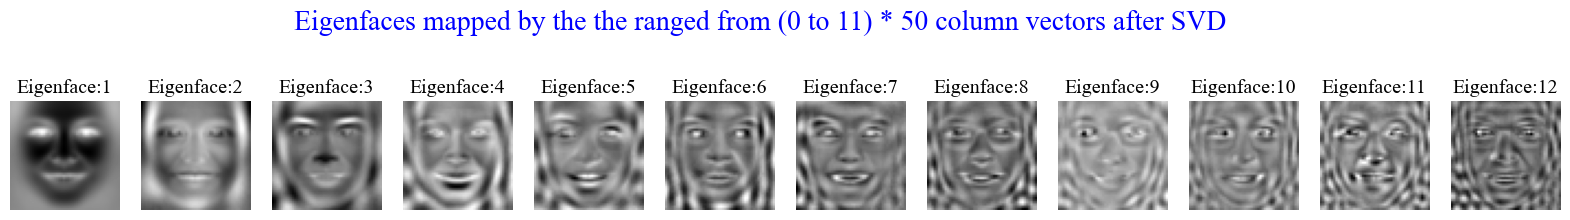

In [16]:
row = 12
fig,ax = plt.subplots(1,row,figsize=(20,3))

for i in range(row):
    eigenface = VT_X_train_SVD[i,:].reshape((50,50))
    ax[i].imshow(eigenface,cmap='gray')
    ax[i].set_title(f"Eigenface:{i + 1}")
    ax[i].axis('off')

plt.suptitle("EIgenfaces mapped by the first 12 column vectors after SVD",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

row1 = 12
fig,ax = plt.subplots(1,row,figsize=(20,3))

for i in range(row1):
    eigenface = VT_X_train_SVD[i*20,:].reshape((50,50))
    ax[i].imshow(eigenface,cmap='gray')
    ax[i].set_title(f"Eigenface:{i + 1}")
    ax[i].axis('off')

plt.suptitle("Eigenfaces mapped by the the ranged from (0 to 11) * 50 column vectors after SVD",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

### Dicussion: Perform Eigenfaces analysis using Eigendecomposition and SVD - Similarities and differences

#### Similarities Eigendecomposition and SVD:
##### 1. Both methods basically decompose the matrix and produce orthogonal eigenfaces
##### 2. The decomposed matrix have the property of orthogonality.
##### 3. They both capture the principal directions of variation in the data.
##### 4. The results are typically very similar for the primary eigenfaces.


#### Differences Eigendecomposition and SVD:
##### 1. Memory usage: Eigendecomposition requires explicit computation of the covariance matrix, which may require more memory.
##### 2. The results are very different for the non-primary eigenfaces.
##### 3. Eigendecomposition decomposes the gram matrix of the train data while SVD decomposes the train data itself 

____

## Predict Model
##### In this section, we will develop models: Linear Regression and Tikhonov Regularization. Both models will be trained using the $X{train}$ dataset and evaluated using the $X{test}$ dataset. 

## Bias Term
##### This function is used to add a bias term to the last column. 

In [17]:
def bias_matrix(dataset):
    biases = np.ones((dataset.shape[0],1))
    dataset = np.hstack((dataset,biases))
    return dataset

# Model - Linear Regression

##### The model is packaged with function and is used to predict the age and the gender. The weight $W$ is calculated using the following formula:

\begin{align}
W = (X_{train}^T X_{train})^{-1} X^T_{train} Y_{train}
\end{align}


In [18]:
def linear_regression(X_train,y_train):
    X_train = bias_matrix(X_train)
    W = (LA.inv(X_train.T @ X_train)) @ X_train.T @ y_train
    return W

# Model - Tikhonov Regularization

##### The model is also packaged with function and also used to predict the age and the gender, but this time it includes a regularization parameter λ, and our task to find the optimal parameter. The weight $W$ is calculated using the following formula:

\begin{align}
W = (X_{train}^T X_{train} + λI)^{-1} X^T_{train} Y_{train}
\end{align}


In [19]:
def Tikhonov_regularization(X_train,y_train,L): 
    biases = np.ones((X_train.shape[0],1))
    X_train = np.hstack((X_train,biases))
    W = (LA.inv((X_train.T @ X_train) + L* np.eye(X_train.shape[1])) @ X_train.T @ y_train)
    return W

## Reshape function
##### After matrix is processed by some operations, sometime its dimensions will disappear, so we create a function to reshape the matrix so that one dimension is still there

In [20]:
def one_dimensional_matrix_reshape(dataset):
    dataset_reshape = dataset.reshape((dataset.shape[0],1))
    return dataset_reshape

## Predicting Age based on Linear Regression Model
##### To predict the age of the testing dataset, we perform the following steps:

##### 1. First, we use ${X_{train}}$ and $Y{train}_{age}$ to train the linear regression model, and calculate the weight $W_{age}$ using the following formula:

\begin{align}
W_{age} = (X_{train}^T X_{train})^{-1} X^T_{train} Y{train}_{age}
\end{align}

##### 2. Second, after obtaining the weight $W_{age}$, we can use it to predict the testing dataset $X_{test}$ age. Use the following formula to calculate the predicted age $Y{predict}_{age}$:

\begin{align}
Y{predict}_{age} = X_{test} W_{age}
\end{align}


In [21]:
W_age_LR = linear_regression(X_train,y_ages_train) 
y_ages_predict_LR = (bias_matrix(X_test)) @ (one_dimensional_matrix_reshape(W_age_LR))

## The result of predicting age based on Linear Regression


Text(0.5, 0.98, 'The face images predict ages based on Linear Regression')

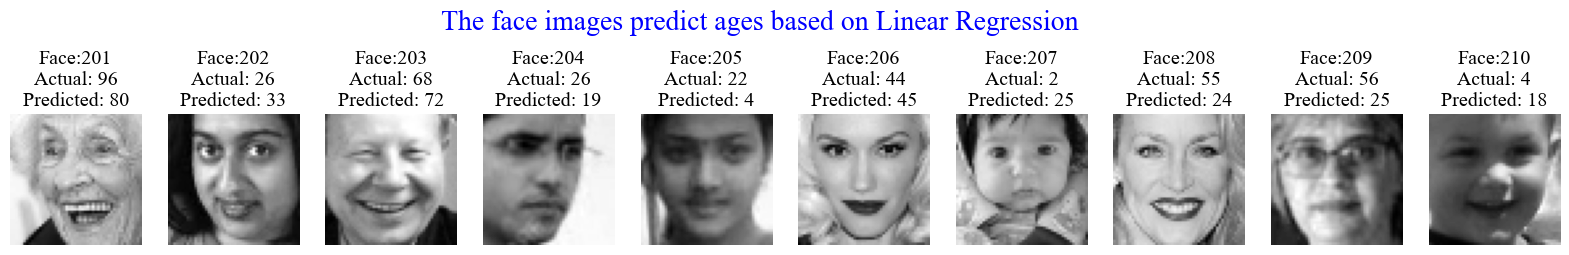

In [22]:
row = 10
offset = 200
fig, ax = plt.subplots(1, row, figsize=(20,3.5))

for i in range(offset, row + offset):
    eigenface = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(eigenface, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(y_ages_predict_LR[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The face images predict ages based on Linear Regression",fontname='TImes New Roman',color='blue',fontsize=20)


## MSE of age prediction based on Linear Regression

##### Here we use MSE to calculate the average squared difference between the predicted value ($Y{predict}_{age}$) and actual value($Y{train}_{age}$). But here we use the scikit-learn function __mean_squared_error__ to calculate. From the result we get the mean square error result is 0.0314, but before that we have divided the whole age by 100, so according to the returned result we need to multiply it by $100^2$ (because the MSE has $^2$ part), so the MSE is $314.26$. We use $ 314.26 $ for square root, so $ \sqrt{314.26} \approx 17.7 $. It means that the average predicted age of each person differs by $17.73$ years.

In [23]:
before_age = mean_squared_error(y_ages_test, y_ages_predict_LR)
print(f"Mean Squared Error: {mean_squared_error(y_ages_test, y_ages_predict_LR)}")
print(f"average difference between predicted age and actual age: {np.sqrt(mean_squared_error(y_ages_test, y_ages_predict_LR)) * 100}")

Mean Squared Error: 0.03142594859458522
average difference between predicted age and actual age: 17.727365454174294


## Predicting Gender based on Linear Regression Model
##### To predict the gender of the testing dataset, we perform the following steps:

##### 1. First, we use ${X_{train}}$ and $Y{train}_{gender}$ to train the linear regression model, and calculate the weight $W_{gender}$ using the following formula:

\begin{align}
W_{gender} = (X_{train}^T X_{train})^{-1} X_{train} Y{train}_{gender}
\end{align}

##### 2. Second, after obtaining the weight $W_{gender}$, we can use it to predict the testing dataset $X_{test}$ gender. Use the following formula to calculate the predicted gender $Y{predict}_{gender}$:

\begin{align}
Y{predict}_{gender} = X_{test} W_{gender}
\end{align}


In [24]:
W_genders_LR = linear_regression(X_train,y_genders_train) 
y_genders_predict_LR = bias_matrix(X_test) @ one_dimensional_matrix_reshape(W_genders_LR)

## The result of predicting gender based on Linear Regression


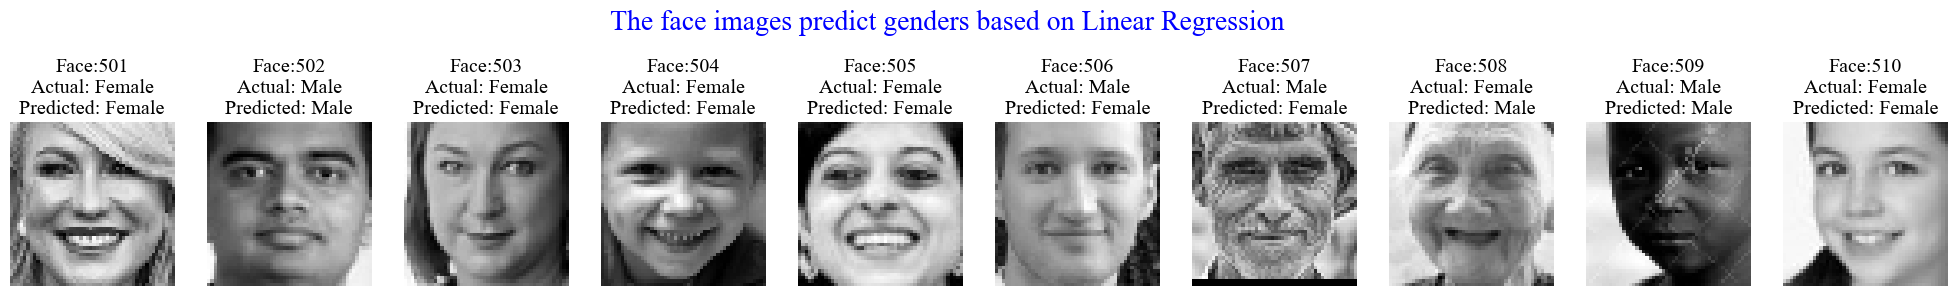

In [25]:
row = 10
offset = 500
fig, ax = plt.subplots(1, row, figsize=(25, 4))

for i in range(offset, row + offset):
    eigenface = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(eigenface, cmap='gray')
    actual_gender = 'Male' if y_genders_test[i] < 0 else 'Female'
    predicted_gender = 'Male' if y_genders_predict_LR[i, 0] < 0 else 'Female'
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {actual_gender}\nPredicted: {predicted_gender}")
    ax[i - offset].axis('off')

plt.suptitle("The face images predict genders based on Linear Regression",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

## Accuracy Function
##### This function is mainly used to calculate the accuracy of classification problems

In [35]:
def get_gender_prediction_accuracy(a, b): 
    return np.mean(np.sign(b.T)[0] == a)

## Accuracy of gender prediction based on Linear Regression
##### We call that function to calculate their accuracy

In [27]:
before_gender = get_gender_prediction_accuracy(y_genders_test, y_genders_predict_LR)
print(f"percentage of correctly predicted genders: {before_gender}")

percentage of correctly predicted genders: 0.7543500511770727


______

### Finding the best Tikhonov Regularization parameter λ (age) [Experiment]

##### 1. To get the best parameters, we use $10^n$ for exploration, where n ranges from -10 to 9 (the parameter value will loop: $10^{-10}$, $10^{-9}$, …, until $10^9$).
##### 2. We use the following formula to calculate  $W_{age}$ and $Y{predict}_{age}$:

\begin{align}
W_{age} = (X_{train}^T X_{train} + λI)^{-1} X_{train} Y{train}_{age}
\end{align}

\begin{align}
Y{predict}_{age} = X_{test} W_{age}
\end{align}

##### 3. After calculation, we minimize MSE , and get the optimal parameters.
##### 4. Every time after calculate the MSE, we append their current parameter value and the currently value in their respective lists.
##### 5. Repeat steps 2-4 until looping ends.
##### 6. After the looping ends, we use the min function to find the minimum value. 
##### 7. After that, we use the minimum values ​​to find the index where the best parameter is.

In [28]:
MSE_data_ages_exp = []
param_data_ages_exp = []

for i in range(-10,10):
    param = 10 ** i
    W_TR = Tikhonov_regularization(X_train, y_ages_train, param)
    y_ages_predict_TR = bias_matrix(X_test) @ one_dimensional_matrix_reshape(W_TR)
    MSE = np.round(mean_squared_error(y_ages_test, y_ages_predict_TR), 4)
    
    print(f"When lambda is {param}, MSE is {MSE}")
    
    MSE_data_ages_exp.append(MSE)
    param_data_ages_exp.append(param)    

min_MSE_ages_exp = min(MSE_data_ages_exp)
best_param_ages_TR = param_data_ages_exp[MSE_data_ages_exp.index(min_MSE_ages_exp)]

print(f"For the experiment of Tikhonov Regularization predict ages, the optimal λ value is {best_param_ages_TR}, where MSE value is {min_MSE_ages_exp}")

When lambda is 1e-10, MSE is 0.0314
When lambda is 1e-09, MSE is 0.0314
When lambda is 1e-08, MSE is 0.0314
When lambda is 1e-07, MSE is 0.0314
When lambda is 1e-06, MSE is 0.0314
When lambda is 1e-05, MSE is 0.0314
When lambda is 0.0001, MSE is 0.0314
When lambda is 0.001, MSE is 0.0314
When lambda is 0.01, MSE is 0.0312
When lambda is 0.1, MSE is 0.03
When lambda is 1, MSE is 0.0261
When lambda is 10, MSE is 0.0233
When lambda is 100, MSE is 0.0238
When lambda is 1000, MSE is 0.0296
When lambda is 10000, MSE is 0.0425
When lambda is 100000, MSE is 0.0601
When lambda is 1000000, MSE is 0.0688
When lambda is 10000000, MSE is 0.0982
When lambda is 100000000, MSE is 0.1371
When lambda is 1000000000, MSE is 0.1449
For the experiment of Tikhonov Regularization predict ages, the optimal λ value is 10, where MSE value is 0.0233


### Finding the best Tikhonov Regularization parameter λ (Gender) [Experiment]

##### 1. To get the best parameters, we use $10^n$ for exploration, where n ranges from -10 to 9 (the parameter value will loop: $10^{-10}$, $10^{-9}$, …, until $10^9$).
##### 2. We use the following formula to calculate  $W_{gender}$ and $Y{predict}_{gender}$:

\begin{align}
W_{gender} = (X_{train}^T X_{train} + λI)^{-1} X_{train} Y{train}_{gender}
\end{align}

\begin{align}
Y{predict}_{gender} = X_{test} W_{gender}
\end{align}

##### 3. After calculation, we minimize MSE and accuracy respectively, and get the optimal parameters by minimizing them, and calculate which one of them has better accuracy.
##### 4. Every time after calculate the MSE and accuracy, we append their current parameter value and the currently value in their respective lists.
##### 5. Repeat steps 2-4 until looping ends.
##### 6. After the looping ends, we use the min function to find the minimum their value. 
##### 7. After that, we use their respective minimum values ​​to find the index where the best parameter is.

## MSE 

In [29]:
MSE_data_genders_exp = []
param_data_genders_exp = []

for i in range(-10, 10):
    param1 = 10 ** i
    W_TR = Tikhonov_regularization(X_train, y_genders_train, param1)
    y_genders_predict_TR = bias_matrix(X_test) @ one_dimensional_matrix_reshape(W_TR)
    MSE = mean_squared_error(y_genders_test, y_genders_predict_TR)
    
    print(f"When lambda is {param1}, MSE is {MSE}")
    MSE_data_genders_exp.append(MSE)
    param_data_genders_exp.append(param1)

min_MSE_genders_exp = min(MSE_data_genders_exp)
best_param_genders_TR_MSE = param_data_genders_exp[MSE_data_genders_exp.index(min_MSE_genders_exp)]


print(f"For MSE, the optimal λ value is {best_param_genders_TR_MSE}, where MSE value is {min_MSE_genders_exp}")

When lambda is 1e-10, MSE is 0.8680865846384992
When lambda is 1e-09, MSE is 0.8680865840880896
When lambda is 1e-08, MSE is 0.8680865786649233
When lambda is 1e-07, MSE is 0.8680865244019215
When lambda is 1e-06, MSE is 0.8680859818156689
When lambda is 1e-05, MSE is 0.8680805561878712
When lambda is 0.0001, MSE is 0.8680263207320492
When lambda is 0.001, MSE is 0.8674860441217748
When lambda is 0.01, MSE is 0.8622815578491927
When lambda is 0.1, MSE is 0.8238274871676534
When lambda is 1, MSE is 0.7172734950632672
When lambda is 10, MSE is 0.6379815296182516
When lambda is 100, MSE is 0.6241493264189738
When lambda is 1000, MSE is 0.6846459012845623
When lambda is 10000, MSE is 0.8298866114720804
When lambda is 100000, MSE is 0.9238307373833858
When lambda is 1000000, MSE is 0.9776415300398212
When lambda is 10000000, MSE is 0.9945439044036545
When lambda is 100000000, MSE is 0.9991034321416291
When lambda is 1000000000, MSE is 0.9999035481057692
For MSE, the optimal λ value is 100, 

## Accuracy

In [30]:
accuracy_array = []
param_accuracy_array = []

for i in range(-10, 10):
    param1 = 10 ** i
    W_TR = Tikhonov_regularization(X_train, y_genders_train, param1)
    y_genders_predict_TR = bias_matrix(X_test) @ one_dimensional_matrix_reshape(W_TR)
    
    accuracy = get_gender_prediction_accuracy(y_genders_test, y_genders_predict_TR)
    
    print(f"When lambda is {param1}, accuracy is {accuracy}")
    accuracy_array.append(accuracy)
    param_accuracy_array.append(param1)

max_accuracy = max(accuracy_array)
best_param_genders_TR_accuracy = param_accuracy_array[accuracy_array.index(max_accuracy)]

print(f"For accuracy, the optimal λ value is {best_param_genders_TR_accuracy}, where accuracy value is {max_accuracy}")

When lambda is 1e-10, accuracy is 0.7543500511770727
When lambda is 1e-09, accuracy is 0.7543500511770727
When lambda is 1e-08, accuracy is 0.7543500511770727
When lambda is 1e-07, accuracy is 0.7543500511770727
When lambda is 1e-06, accuracy is 0.7543500511770727
When lambda is 1e-05, accuracy is 0.7543500511770727
When lambda is 0.0001, accuracy is 0.7543500511770727
When lambda is 0.001, accuracy is 0.7543500511770727
When lambda is 0.01, accuracy is 0.7543500511770727
When lambda is 0.1, accuracy is 0.7615148413510747
When lambda is 1, accuracy is 0.7737973387922211
When lambda is 10, accuracy is 0.7840327533265097
When lambda is 100, accuracy is 0.7850562947799385
When lambda is 1000, accuracy is 0.7533265097236438
When lambda is 10000, accuracy is 0.6601842374616171
When lambda is 100000, accuracy is 0.5926305015353122
When lambda is 1000000, accuracy is 0.5383828045035824
When lambda is 10000000, accuracy is 0.534288638689867
When lambda is 100000000, accuracy is 0.5342886386898

## Predicting Age based on Tikhonov Regularization Model

In [31]:
W_ages_TR = Tikhonov_regularization(X_train,y_ages_train,best_param_ages_TR)
y_ages_predict_TR = (bias_matrix(X_test)) @ (one_dimensional_matrix_reshape(W_ages_TR))

## Visualize the result of predict ages based on Tikhonov Regularization

Text(0.5, 0.98, 'The face images predict ages based on Tikhonov Regularization')

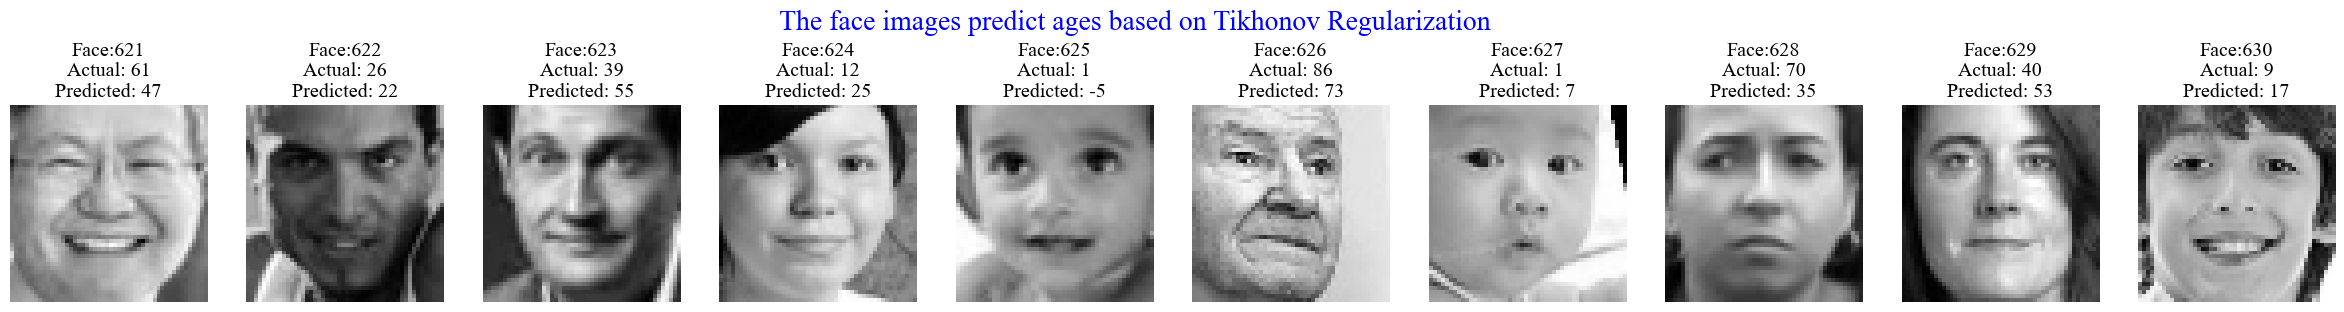

In [32]:
row = 10
offset = 620
fig, ax = plt.subplots(1, row, figsize=(30,4))

for i in range(offset, row + offset):
    eigenface = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(eigenface, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(y_ages_predict_TR[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The face images predict ages based on Tikhonov Regularization",fontname='TImes New Roman',color='blue',fontsize=20)

## MSE of age prediction based on Tikhonov Regularization
##### From the result we get the mean square error result is 0.0232. We use $ 232.92 $ for square root, so $ \sqrt{232.92} \approx 15.26 $. It means that the average predicted age of each person differs by $15.26$ years.

In [33]:
after_age = mean_squared_error(y_ages_test, y_ages_predict_TR)
print(f"Mean Squared Error: {after_age}")
print(f"average difference between predicted age and actual age: {np.sqrt(after_age) * 100}")

Mean Squared Error: 0.023285695497320662
average difference between predicted age and actual age: 15.259651207455779


## Predicting Gender based on Tikhonov Regularization Model 


In [34]:
W_genders_TR = Tikhonov_regularization(X_train,y_genders_train,max_accuracy)
y_genders_predict_TR = (bias_matrix(X_test)) @ (one_dimensional_matrix_reshape(W_genders_TR))

## Visualize the result of predict gender based on Tikhonov Regularization

Text(0.5, 0.98, 'The face images predict genders based on Tikhonov Regularization')

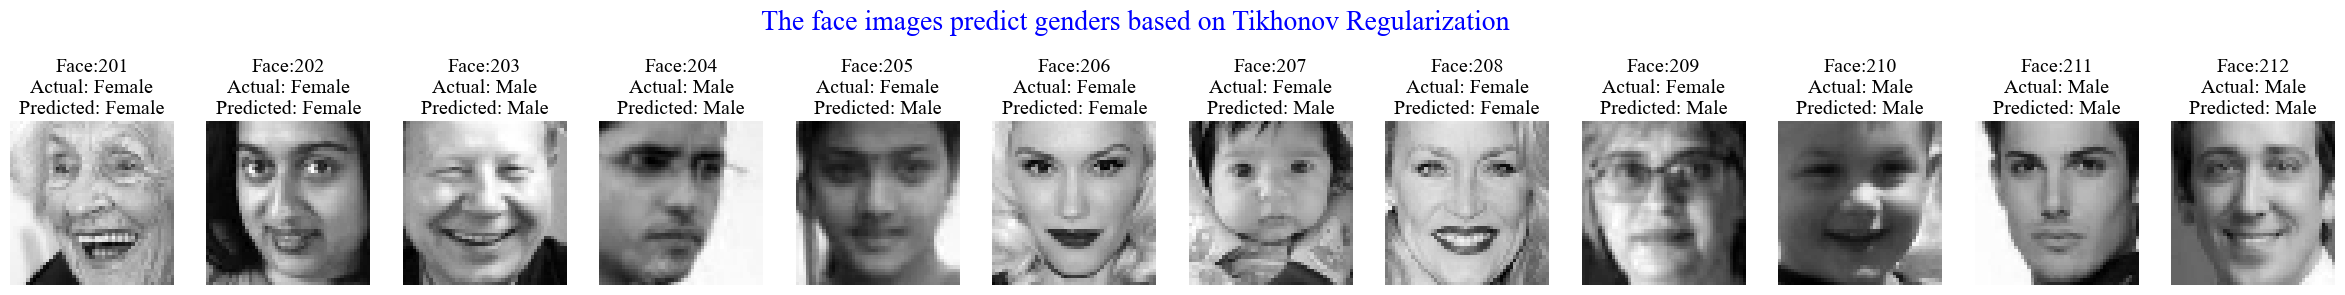

In [35]:
row = 12
offset = 200
fig, ax = plt.subplots(1, row, figsize=(30, 4))

for i in range(offset, row + offset):
    eigenface = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(eigenface, cmap='gray')
    actual_gender = 'Male' if y_genders_test[i] < 0 else 'Female'
    predicted_gender = 'Male' if y_genders_predict_TR[i, 0] < 0 else 'Female'
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {actual_gender}\nPredicted: {predicted_gender}")
    ax[i - offset].axis('off')

plt.suptitle("The face images predict genders based on Tikhonov Regularization",fontname='TImes New Roman',color='blue',fontsize=20)

## Accuracy of predict gender based on Tikhonov Regularization


In [36]:
after_gender = get_gender_prediction_accuracy(y_genders_test, y_genders_predict_TR)
print(f"percentage of correctly predicted genders: {after_gender}")

percentage of correctly predicted genders: 0.7686796315250768


## Analysis:

##### Based on the results, it is clear how Tikhonov Regularization can increase the test accuracy for linear regression

In [37]:
print(f"MSE of age prediction before and after Tikhonov Regularization:\nbefore: {before_age}\nafter: {after_age}\n")
print(f"accuracy of gender prediction before and after Tikhonov Regularization:\nbefore: {before_gender}\nafter: {after_gender}")

MSE of age prediction before and after Tikhonov Regularization:
before: 0.03142594859458522
after: 0.023285695497320662

accuracy of gender prediction before and after Tikhonov Regularization:
before: 0.7543500511770727
after: 0.7686796315250768


___

# SVD processed feature

#### Whitening Step:
##### 1. We use the demeaned training set for SVD:

\begin{align}

X{train}_{demean} = Q_{X{train}_{demean}} σ_{X{train}_{demean}} P^T_{X{train}_{demean}}

\end{align}

##### 2. We use the following formula to calculate the square root of the eigenvalue:

\begin{align}

\lambda_r =  \frac{{σ^{2}}^{(r)}_{X{train}_{demean}}}{n} \Rightarrow  \sqrt \lambda_r = \frac{σ^{(r)}_{X{train}_{demean}}}{\sqrt{n}}
\end{align}

##### 3. We select $k$ values and use it to calculate the $X{train}_{whitten}$ : 

\begin{align}

X{train}_{whitten} = X{train}_{demean} P[:,:k] (\sqrt{\lambda}_{kk})^{-1} P^T[:k,:]
\end{align}

##### where P is right singular vectors, $\sqrt{λ}_{kk}$ is the square root of the eigenvalue are placed into a diagonal matrix.

In [22]:
Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / (X_train.shape[0] ** 0.5)
k = 10
X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))

# Visualization applications selects k value and whittens the image 

##### We show 11 groups of images with different k values and have whitened, and each group has 10 images.
# NO MORE !!

## Experiment
##### 1. Here, we will introduce the experiments of linear regression and tikhonov regularization together. 
##### 2. First of all, both experiments are based on finding the best k, so our search range is from 10 to 500. The difference between linear regression and tikhonov regularization is that tikhonov regularization needs to find one more value of λ

### Using SVD to implement Linear Regression Model [Experiment]


In [32]:
Q1, s1, PT1 = LA.svd(X_train_demean.copy())
eigenvalues_train = s1 / (X_train.shape[0] ** 0.5)


min_mse_list = []
k_values = []

for k in range(10, 2000, 10):
    X_train_whitened_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(eigenvalues_train[:k]))
    X_test_whitened_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(eigenvalues_train[:k]))
    
    k_values.append(k)
    
    weights_age_lr_whitened = linear_regression(X_train_whitened_reduced, y_ages_train)
    y_ages_predicted_lr_whitened = bias_matrix(X_test_whitened_reduced) @ one_dimensional_matrix_reshape(weights_age_lr_whitened)
    
    mse = mean_squared_error(y_ages_test, y_ages_predicted_lr_whitened)
    min_mse_list.append(mse)
    print(f"When k is {k}, MSE is {mse}")
    
min_mse_age_experiment = min(min_mse_list)
best_k_value_age_lr_whitened = k_values[min_mse_list.index(min_mse_age_experiment)]
print(f"For the experiment of Linear Regression using SVD to predict ages, the optimal k value is {best_k_value_age_lr_whitened}, where MSE value is {min_mse_age_experiment}")


When k is 10, MSE is 0.047157604429472616
When k is 20, MSE is 0.03537845382032769
When k is 30, MSE is 0.03110902038715032
When k is 40, MSE is 0.03034228500403836
When k is 50, MSE is 0.030053079723106328
When k is 60, MSE is 0.029952591992215134
When k is 70, MSE is 0.029276349937584947
When k is 80, MSE is 0.02821184837946809
When k is 90, MSE is 0.028529354805153197
When k is 100, MSE is 0.028483663072355923
When k is 110, MSE is 0.02837162253841066
When k is 120, MSE is 0.028225974953536844
When k is 130, MSE is 0.028187588917002186
When k is 140, MSE is 0.027930934605807544
When k is 150, MSE is 0.027538233536812808
When k is 160, MSE is 0.027311422510953944
When k is 170, MSE is 0.027044032861526717
When k is 180, MSE is 0.026859603736418887
When k is 190, MSE is 0.026399522532260446
When k is 200, MSE is 0.025564417823062926
When k is 210, MSE is 0.025398472714863143
When k is 220, MSE is 0.025447225928533747
When k is 230, MSE is 0.025539913084010022
When k is 240, MSE is 0.0

In [37]:
Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / (X_train.shape[0] ** 0.5)


min_mse_gender = []
max_acc_gender = []
k_values_gender = []

for k in range(10, 2000, 10):
    X_train_whitened_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
    X_test_whitened_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
    
    k_values_gender.append(k)
    
    weights_gender_lr_whitened = linear_regression(X_train_whitened_reduced, y_genders_train)
    y_gender_predicted_lr_whitened = bias_matrix(X_test_whitened_reduced) @ one_dimensional_matrix_reshape(weights_gender_lr_whitened)
    
    
    mse_gender = mean_squared_error(y_genders_test, y_gender_predicted_lr_whitened)
    min_mse_gender.append(mse_gender)
    acc = get_gender_prediction_accuracy(y_genders_test, y_gender_predicted_lr_whitened)
    max_acc_gender.append(acc)
    print(f"When k is {k}, MSE is {mse_gender}, acc is {acc}")
    
max_acc_gender_experiment = max(max_acc_gender)
best_k_value_gender_lr_whitened = k_values_gender[max_acc_gender.index(max_acc_gender_experiment)]
print(f"For the experiment of Linear Regression using SVD to predict gender, the optimal k value is {best_k_value_gender_lr_whitened}, where acc value is {max_acc_gender_experiment}")


When k is 10, MSE is 0.9357482132802671, acc is 0.6151484135107472
When k is 20, MSE is 0.8909983001083861, acc is 0.6366427840327533
When k is 30, MSE is 0.8238021304366603, acc is 0.6816786079836233
When k is 40, MSE is 0.7591791341482023, acc is 0.706243602865916
When k is 50, MSE is 0.7280660289699974, acc is 0.714431934493347
When k is 60, MSE is 0.7055035141561291, acc is 0.7389969293756398
When k is 70, MSE is 0.6799171233435479, acc is 0.7471852610030706
When k is 80, MSE is 0.6732666402108984, acc is 0.7502558853633572
When k is 90, MSE is 0.6725697444770146, acc is 0.7533265097236438
When k is 100, MSE is 0.6677262917735702, acc is 0.759467758444217
When k is 110, MSE is 0.6569297660914675, acc is 0.7635619242579325
When k is 120, MSE is 0.6469883888542179, acc is 0.7645854657113613
When k is 130, MSE is 0.6483558381600611, acc is 0.7635619242579325
When k is 140, MSE is 0.6432096439644862, acc is 0.7615148413510747
When k is 150, MSE is 0.6407401609792678, acc is 0.760491299

In [38]:
Q1, s1, PT1 = LA.svd(X_train_demean.copy())
eigenvalues_train = s1 / (X_train.shape[0] ** 0.5)


min_mse_age = []
k_values_age = []
lambda_values_age = []

for k in range(10, 500, 10):
    X_train_whitened_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(eigenvalues_train[:k]))
    X_test_whitened_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(eigenvalues_train[:k]))
    
    for i in range(0, 4, 1):
        lambda_param = 10 ** i
        weights_age_tr_whitened = Tikhonov_regularization(X_train_whitened_reduced, y_ages_train, lambda_param)
        y_ages_predicted_tr_whitened = bias_matrix(X_test_whitened_reduced) @ one_dimensional_matrix_reshape(weights_age_tr_whitened)
        mse_age = mean_squared_error(y_ages_test, y_ages_predicted_tr_whitened)
        print(f"When lambda is {lambda_param}, k is {k}, MSE is {mse_age}")
        min_mse_age.append(mse_age)
        lambda_values_age.append(lambda_param)
        k_values_age.append(k)
        
min_mse_age_experiment = min(min_mse_age)
best_index_age = min_mse_age.index(min_mse_age_experiment)
best_k_value_age = k_values_age[best_index_age]
best_lambda_value_age = lambda_values_age[best_index_age]

print(f"The optimal λ value is {best_lambda_value_age}, k value is {best_k_value_age}, where MSE value is {min_mse_age_experiment}")


When lambda is 1, k is 10, MSE is 0.04715741861733571
When lambda is 10, k is 10, MSE is 0.04715586493766456
When lambda is 100, k is 10, MSE is 0.047151811540603654
When lambda is 1000, k is 10, MSE is 0.04803752619758089
When lambda is 1, k is 20, MSE is 0.03537817823250197
When lambda is 10, k is 20, MSE is 0.035375832113237936
When lambda is 100, k is 20, MSE is 0.03536535949387772
When lambda is 1000, k is 20, MSE is 0.03630889711291827
When lambda is 1, k is 30, MSE is 0.031108674846180257
When lambda is 10, k is 30, MSE is 0.031105705547094412
When lambda is 100, k is 30, MSE is 0.031089621181664147
When lambda is 1000, k is 30, MSE is 0.03202761167457133
When lambda is 1, k is 40, MSE is 0.030341973686984203
When lambda is 10, k is 40, MSE is 0.030339312595172925
When lambda is 100, k is 40, MSE is 0.03032632850156444
When lambda is 1000, k is 40, MSE is 0.03129646874045509
When lambda is 1, k is 50, MSE is 0.030052793462133083
When lambda is 10, k is 50, MSE is 0.0300503576990

KeyboardInterrupt: 

In [39]:
Q1, s1, PT1 = LA.svd(X_train_demean.copy())
eigenvalues_train = s1 / (X_train.shape[0] ** 0.5)


min_mse_gender = []
k_values_gender = []
lambda_values_gender = []

for k in range(10, 500, 10):
    X_train_whitened_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(eigenvalues_train[:k]))
    X_test_whitened_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(eigenvalues_train[:k]))
    
    for i in range(0, 4, 1):
        lambda_param = 10 ** i
        weights_gender_tr_whitened = Tikhonov_regularization(X_train_whitened_reduced, y_genders_train, lambda_param)
        y_gender_predicted_tr_whitened = bias_matrix(X_test_whitened_reduced) @ one_dimensional_matrix_reshape(weights_gender_tr_whitened)
        mse_gender = mean_squared_error(y_genders_test, y_gender_predicted_tr_whitened)
        print(f"When lambda is {lambda_param}, k is {k}, MSE is {mse_gender}")
        min_mse_gender.append(mse_gender)
        lambda_values_gender.append(lambda_param)
        k_values_gender.append(k)
        
min_mse_gender_experiment = min(min_mse_gender)
best_index_gender = min_mse_gender.index(min_mse_gender_experiment)
best_k_value_gender = k_values_gender[best_index_gender]
best_lambda_value_gender = lambda_values_gender[best_index_gender]

print(f"The optimal λ value is {best_lambda_value_gender}, k value is {best_k_value_gender}, where MSE value is {min_mse_gender_experiment}")


When lambda is 1, k is 10, MSE is 0.9357396097995746
When lambda is 10, k is 10, MSE is 0.9356624292213005
When lambda is 100, k is 10, MSE is 0.9349149886348658
When lambda is 1000, k is 10, MSE is 0.929482192885972
When lambda is 1, k is 20, MSE is 0.8909904178744865
When lambda is 10, k is 20, MSE is 0.8909197658307949
When lambda is 100, k is 20, MSE is 0.8902412137499687
When lambda is 1000, k is 20, MSE is 0.885780685967803
When lambda is 1, k is 30, MSE is 0.8237957405700507
When lambda is 10, k is 30, MSE is 0.8237385674880884
When lambda is 100, k is 30, MSE is 0.8231994004741584
When lambda is 1000, k is 30, MSE is 0.8204888260444162
When lambda is 1, k is 40, MSE is 0.7591738735666845
When lambda is 10, k is 40, MSE is 0.7591269161398537
When lambda is 100, k is 40, MSE is 0.7586949342807706
When lambda is 1000, k is 40, MSE is 0.757450562483577
When lambda is 1, k is 50, MSE is 0.7280630945738943
When lambda is 10, k is 50, MSE is 0.7280370614325049
When lambda is 100, k is

KeyboardInterrupt: 

In [40]:
Q1, s1, PT1 = LA.svd(X_train_demean.copy())
eigenvalues_train = s1 / (X_train.shape[0] ** 0.5)


min_mse_gender = []
k_values_gender = []
lambda_values_gender = []
lambda_param = 0
for k in range(10, 500, 10):
    X_train_whitened_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(eigenvalues_train[:k]))
    X_test_whitened_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(eigenvalues_train[:k])) 
    print(X_train_whitened_reduced.shape)
    weights_gender_tr_whitened = Tikhonov_regularization(X_train_whitened_reduced, y_genders_train, lambda_param)
    y_gender_predicted_tr_whitened = bias_matrix(X_test_whitened_reduced) @ one_dimensional_matrix_reshape(weights_gender_tr_whitened)
    mse_gender = mean_squared_error(y_genders_test, y_gender_predicted_tr_whitened)
    print(f"When lambda is {lambda_param}, k is {k}, MSE is {mse_gender}")
    min_mse_gender.append(mse_gender)
    lambda_values_gender.append(lambda_param)
    k_values_gender.append(k)
        
min_mse_gender_experiment = min(min_mse_gender)
best_index_gender = min_mse_gender.index(min_mse_gender_experiment)
best_k_value_gender = k_values_gender[best_index_gender]
best_lambda_value_gender = lambda_values_gender[best_index_gender]

print(f"The optimal λ value is {best_lambda_value_gender}, k value is {best_k_value_gender}, where MSE value is {min_mse_gender_experiment}")


(8785, 10)
When lambda is 0, k is 10, MSE is 0.9357482132802671
(8785, 20)
When lambda is 0, k is 20, MSE is 0.8909983001083861
(8785, 30)
When lambda is 0, k is 30, MSE is 0.8238021304366603
(8785, 40)
When lambda is 0, k is 40, MSE is 0.7591791341482023
(8785, 50)
When lambda is 0, k is 50, MSE is 0.7280660289699974
(8785, 60)
When lambda is 0, k is 60, MSE is 0.7055035141561291
(8785, 70)
When lambda is 0, k is 70, MSE is 0.6799171233435479
(8785, 80)
When lambda is 0, k is 80, MSE is 0.6732666402108984
(8785, 90)
When lambda is 0, k is 90, MSE is 0.6725697444770146
(8785, 100)
When lambda is 0, k is 100, MSE is 0.6677262917735702
(8785, 110)
When lambda is 0, k is 110, MSE is 0.6569297660914675
(8785, 120)
When lambda is 0, k is 120, MSE is 0.6469883888542179
(8785, 130)
When lambda is 0, k is 130, MSE is 0.6483558381600611
(8785, 140)
When lambda is 0, k is 140, MSE is 0.6432096439644862
(8785, 150)
When lambda is 0, k is 150, MSE is 0.6407401609792678
(8785, 160)
When lambda is 0

___

# ANN PART

## Predict Function:
##### 1. This function implements with one hidden layer feedfoward neural network. We take each row of the training set as the input layer and add a bias term to each row. 
##### 2. After adding, we dot product it with the added bias term and $W_{hidden}$ (we will introduce later), and use the activation function (sigmoid function) to map the output of the hidden layer 0 to 1. 
##### 3. We add another bias term to the output just calculated. After that, we dot product it with $W_{output}$ (we will also introduce it later). Then we can get a value (predicted value). 
##### 4. Last, we return 3 values respectively: predicted value, add a bias term to each row of the training set, and add another bias term to the hidden layer output value.

## Activation Function:
##### 1. The activation function used here is sigmoid function.
##### 2. The formula for the sigmoid function is:  $y =\frac{1}{1+e^{-x}}$.

In [41]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [42]:
def predict(X, W_hidden,W_output):

    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output@x_h_i_1
        y_pred.append([x_o[0][0]])

    return np.array(y_pred),x_h_i_1,x_i_1

## Using Grid Search find the best ANN hyperparameter

##### 1. $k = [30,50,70]$
##### 2. learning rate = $[0.002,0.01,0.05]$
##### 3. hidden layer = $[4,8,16] $
##### 4. epoch = $ 0 - 200$
##### 5. alpha init = $[0.00005, 0.0001, 0.0002]$
##### Here, let's talk about why we choose all of these parameters for the experiment. 
##### 1. First, we created a simple model from k = 10 until 200 and found that the best range is around 50 in manual experiment, so we choose 30,50,70 for k. 
##### 2. Second, the range for the learning rate and alpha init cannot be too large. If the range exceeds too much, the loss function will not decrease.  
##### 3. Third, we choose 200 epochs because overfitting will occur at about 100 in manual experiment, so we adjusted it to 200 to ensure the best results. 
##### 4. Finally, if the hidden layer size is too large, we will not be able to run it in time. The grid search here takes an everage of 7 hours to run the program to find the best parameters, so we have annotated this part and also explained how we choose parameters and find the best parameter.


### SGD ANN for predict age (Experiment)


In [50]:
ks = [40, 80 , 160, 320]
learning_rates = [0.002, 0.01, 0.05]
neurons = [4, 8 ,16]
best_loss = 1000000

Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5

for k in ks:
    for learning_rate in learning_rates:
        for neuron_in_hidden_layer in neurons:


            X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
            X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
            
    
            ann_whitten_X_train = X_train_whitten_reduced.copy()
            ann_y_age_train = y_ages_train.copy()
            ann_y_genders_train = y_genders_train.copy()
            
            
            
            ann_whitten_X_test = X_test_whitten_reduced.copy()
            ann_y_age_test = y_ages_test.copy()
            ann_y_genders_test = y_genders_test.copy()
            
            
            
            
            W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
            
            W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer
            
            
            for e in range(200):# for each epoch
                for i in range(X_train.shape[0]):
                    #define input and output
                    x_i = ann_whitten_X_train[i:i+1]
                    y_i = ann_y_age_train[i]
            
                    y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)
            
                    delta_k = y_i - y_pred_i
            
                    #Gradient for output layer
                    Gradient_output  = -delta_k*x_h_i_1.T
                    
                    W_output = W_output - learning_rate * Gradient_output
            
                    delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
            
                    # Update each hidden unit
                    Gradient_hidden = np.zeros_like(W_hidden)
                    for h in range(W_hidden.shape[0]):
            
                        #Gradient for hidden layer
                        Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
                    # Gradient Descent rule
                    
                
                    W_hidden = W_hidden - learning_rate * Gradient_hidden
            
                    
                y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
                test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
                
                loss = mean_squared_error(ann_y_age_test,test_y_pred)
                if loss < best_loss:
                    print(f"{loss=},{k=},{learning_rate=},{neuron_in_hidden_layer=},{e=}")
                    best_loss = loss

loss=0.038199560490476826,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=0
loss=0.030976128240810998,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=1
loss=0.03004473567038443,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=2
loss=0.030038764243303748,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=6
loss=0.03001245725845946,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=7
loss=0.029984689238709568,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=8
loss=0.029956320299707774,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=9
loss=0.029927642110350077,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=10
loss=0.029898762393076577,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=11
loss=0.029869729057756495,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=12
loss=0.029840571176678734,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=13
loss=0.029811312821571866,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=14
loss=0.029781977738992913,k=40,learni

### ADAM ANN for predict age (Experiment)


In [45]:
ks = [40, 80 , 160, 320]
learning_rates = [0.00005, 0.0001, 0.0002]
neurons = [4, 8 ,16]
best_loss = 1000000

Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5

for k in ks:
    for alpha_init in learning_rates:
        for neuron_in_hidden_layer in neurons:
            
            
            X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
            X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
            
    
            ann_whitten_X_train = X_train_whitten_reduced.copy()
            ann_y_age_train = y_ages_train.copy()
            ann_y_genders_train = y_genders_train.copy()
            
            
            
            ann_whitten_X_test = X_test_whitten_reduced.copy()
            ann_y_age_test = y_ages_test.copy()
            ann_y_genders_test = y_genders_test.copy()   
            
            W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
            
            W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer
            
            small_value = 1e-8
            
            
            A_hidden = np.zeros_like(W_hidden)
            F_hidden = np.zeros_like(W_hidden)
            
            A_output = np.zeros_like(W_output)
            F_output = np.zeros_like(W_output)
            
            rho = 0.999
            rho_f = 0.9
            
            
            for e in range(200):# for each epoch
                for i in range(X_train.shape[0]):
                    #define input and output
                    x_i = ann_whitten_X_train[i:i+1]
                    y_i = ann_y_age_train[i]
            
                    y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)
            
                    delta_k = y_i - y_pred_i
            
                    #Gradient for output layer
                    Gradient_output  = -delta_k*x_h_i_1.T
                    
                    A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2
            
                    F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)
                
                    alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
                
                    W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)
            
            
                    delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
            
                    # Update each hidden unit
                    Gradient_hidden = np.zeros_like(W_hidden)
                    for h in range(W_hidden.shape[0]):
            
                        #Gradient for hidden layer
                        Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
                    # Gradient Descent rule
                    
                    A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2
            
                    F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)
                
                    alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
                
                    W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)
            
                    
                y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
                test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
                
                loss = mean_squared_error(ann_y_age_test,test_y_pred)
                if loss < best_loss:
                    print(f"{loss=},{k=},{alpha_init=},{neuron_in_hidden_layer=},{e=}")
                    best_loss = loss


loss=0.04398159350381748,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=0
loss=0.034946803249985066,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=1
loss=0.030823354508011443,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=2
loss=0.029651487171153065,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=3
loss=0.029443381596762387,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=4
loss=0.02943655410634741,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=5
loss=0.02943203999169836,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=9
loss=0.029417131234801188,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=10
loss=0.02940080961344176,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=11
loss=0.02938381884468194,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=12
loss=0.02936654774107127,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=13
loss=0.029349201676253586,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=14
loss=0.0293318914772298,k=40,alpha_init=5e-05,neuron_in_hidden_layer=4,e=15
l

KeyboardInterrupt: 

### SGD ANN for predict gender (Experiment)


In [51]:
ks = [40, 80 , 160, 320]
learning_rates = [0.002, 0.01, 0.05]
neurons = [4, 8 ,16]
best_loss = 1000000

Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5

for k in ks:
    for learning_rate in learning_rates:
        for neuron_in_hidden_layer in neurons:
            
            
            
            X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
            X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
            
    
            ann_whitten_X_train = X_train_whitten_reduced.copy()
            ann_y_age_train = y_ages_train.copy()
            ann_y_genders_train = y_genders_train.copy()
            
            
            
            ann_whitten_X_test = X_test_whitten_reduced.copy()
            ann_y_age_test = y_ages_test.copy()
            ann_y_genders_test = y_genders_test.copy()
            
            
            
            
            
            
            W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
            
            W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer
            
            
            
            
            
            for e in range(200):# for each epoch
                for i in range(X_train.shape[0]):
                    #define input and output
                    x_i = ann_whitten_X_train[i:i+1]
                    y_i = ann_y_genders_train[i]
            
                    y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)
            
                    delta_k = y_i - y_pred_i
            
                    #Gradient for output layer
                    Gradient_output  = -delta_k*x_h_i_1.T
                    
                
                    W_output = W_output - learning_rate * Gradient_output
                    
            
            
                    delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
            
                    # Update each hidden unit
                    Gradient_hidden = np.zeros_like(W_hidden)
                    for h in range(W_hidden.shape[0]):
            
                        #Gradient for hidden layer
                        Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
                    # Gradient Descent rule
                
                    W_hidden = W_hidden - learning_rate * Gradient_hidden
                    
            
                y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
                test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
                
                loss = mean_squared_error(ann_y_genders_test,test_y_pred)
                acc = get_gender_prediction_accuracy( ann_y_genders_test , test_y_pred)
                if loss < best_loss:
                    print(f"{loss=},{k=},{learning_rate=},{neuron_in_hidden_layer=},{e=},{acc=}")
                    best_loss = loss
                    
    


loss=0.8485324008713577,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=0,acc=0.7052200614124872
loss=0.74943389434836,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=1,acc=0.7072671443193449
loss=0.7494338798902463,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=13,acc=0.7093142272262026
loss=0.7484961303081258,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=14,acc=0.7103377686796315
loss=0.7473892218862467,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=15,acc=0.7103377686796315
loss=0.7461296955983132,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=16,acc=0.7082906857727738
loss=0.7447455393259187,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=17,acc=0.7082906857727738
loss=0.7432732953989337,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=18,acc=0.7103377686796315
loss=0.741752305291199,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=19,acc=0.7093142272262026
loss=0.7402181802070106,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=20,acc=0.71

### ADAM ANN for predict gender (Experiment)


In [48]:
ks = [40, 80 , 160, 320]
learning_rates = [0.00005, 0.0001, 0.0002]
neurons = [4, 8 ,16]
best_loss = 1000000

Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5

for k in ks:
    for alpha_init in learning_rates:
        for neuron_in_hidden_layer in neurons:

            
            X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
            X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
            
    
            ann_whitten_X_train = X_train_whitten_reduced.copy()
            ann_y_age_train = y_ages_train.copy()
            ann_y_genders_train = y_genders_train.copy()
            
            
            
            ann_whitten_X_test = X_test_whitten_reduced.copy()
            ann_y_age_test = y_ages_test.copy()
            ann_y_genders_test = y_genders_test.copy()
            
            
            
            W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
            
            W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer
            
            small_value = 1e-8
            
            
            A_hidden = np.zeros_like(W_hidden)
            F_hidden = np.zeros_like(W_hidden)
            
            A_output = np.zeros_like(W_output)
            F_output = np.zeros_like(W_output)
            
            rho = 0.999
            rho_f = 0.9
            
            
            
            for e in range(200):# for each epoch
                for i in range(X_train.shape[0]):
                    #define input and output
                    x_i = ann_whitten_X_train[i:i+1]
                    y_i = ann_y_genders_train[i]
            
                    y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)
            
                    delta_k = y_i - y_pred_i
            
                    #Gradient for output layer
                    Gradient_output  = -delta_k*x_h_i_1.T
                    
                    A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2
            
                    F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)
                
                    alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
                
                    W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)
                    
            
            
                    delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
            
                    # Update each hidden unit
                    Gradient_hidden = np.zeros_like(W_hidden)
                    for h in range(W_hidden.shape[0]):
            
                        #Gradient for hidden layer
                        Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
                    # Gradient Descent rule
                    
                    A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2
            
                    F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)
                
                    alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
                
                    W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)
                    
            
            
                y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
                test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
                
                loss = mean_squared_error(ann_y_genders_test,test_y_pred)
                acc = get_gender_prediction_accuracy( ann_y_genders_test , test_y_pred)
                if loss < best_loss:
                    print(f"{loss=},{k=},{learning_rate=},{neuron_in_hidden_layer=},{e=},{acc=}")
                    best_loss = loss
    

loss=0.9516958164114665,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=0,acc=0.6622313203684749
loss=0.9092469032602889,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=1,acc=0.6489252814738997
loss=0.8681664491102249,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=2,acc=0.6816786079836233
loss=0.8307504045202653,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=3,acc=0.6929375639713409
loss=0.8008109960031263,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=4,acc=0.6960081883316275
loss=0.77945057947127,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=5,acc=0.7001023541453428
loss=0.7656327140203,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=6,acc=0.7072671443193449
loss=0.7574373624243419,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=7,acc=0.706243602865916
loss=0.752975751974869,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=8,acc=0.706243602865916
loss=0.7507849628466504,k=40,learning_rate=0.002,neuron_in_hidden_layer=4,e=9,acc=0.705220061412487

KeyboardInterrupt: 

___

# ANN Model 

##### Basically, the steps of the model here is similiar. The difference things is in the use of optimizers. Here, our model is trained using the whitened training set （but this part we use original dataset) and the original training set (trying which one performance is better). 

##### 1. First, we initialize the weight values $W_{hidden}$ and $W_{output}$. $W_{hidden}$ is the weight between input layer and hidden layer, while $W_{output}$ is the weight between hidden layer and output layer.

##### 2. Then we train the training set of each row to perform the feedforward Neural Network algorithm (predict function). After the calculation, the function will return the values we just mentioned.

##### 3. After this, we will use the backpropagation algorithm. First, we calculate the error term of the output layer: $\delta k = y_i - Y{{Pred}_i}$. 
##### Next, we calculate the $\nabla w_{output} L = -\delta k * x^T_{hidden}$, where $\nabla w_{output} L$ is the gradient loss function of the output layer and we use the learning rate optimizer to update the new $W_{output}$ (this will be introduced in the usage section).

##### 4. After updating the new $W_{output}$, we continue to update the new $W_{hidden}$. 
##### First, we calculate the error term of the hidden layer: $\delta h = X_{hidden} *(1- X_{hidden})*W^T_{output}*\delta k$, then we compute the gradient loss function of the hidden layer: $\nabla w_{hidden} L = -\delta h * x_i$

## Predicting age based on ANN using optimizer SGD (Original Dataset) 
#### parameter: loss=0.018824409849085212,k=70,learning_rate=0.01,neuron_in_hidden_layer=8,e=146
##### The optimizer used here is SGD, whose update rule is $W_{output} \Leftarrow W_{output} - \alpha * \nabla w_{hidden} L$

In [50]:
k = 70
learning_rate = 0.01
neuron_in_hidden_layer = 8

ann_X_train = X_train.copy()
ann_y_age_train = y_ages_train.copy()

ann_X_test = X_test.copy()
ann_y_age_test = y_ages_test.copy()

W_hidden = np.random.randn(neuron_in_hidden_layer,ann_X_train.shape[1]+1)/k
W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

for e in range(146):
    for i in range(X_train.shape[0]):

        x_i = ann_X_train[i:i+1]
        y_i = ann_y_age_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        Gradient_output  = -delta_k*x_h_i_1.T

        W_output = W_output - learning_rate * Gradient_output

        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        W_hidden = W_hidden - learning_rate * Gradient_hidden

    y_pred,_,_ = predict(ann_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_age_test,test_y_pred)

    print(f"{loss=},{e=}")          

loss=0.03049964025639841,e=0
loss=0.027013770155134474,e=1
loss=0.026005458207455034,e=2
loss=0.025434610451928925,e=3
loss=0.025008897241150803,e=4
loss=0.0246559797690177,e=5
loss=0.02434437017599404,e=6
loss=0.024063327839548343,e=7
loss=0.023810111505042045,e=8
loss=0.02358141995431085,e=9
loss=0.023372817647838155,e=10
loss=0.02318053492334683,e=11
loss=0.023001988412855154,e=12
loss=0.0228355566814528,e=13
loss=0.022680234428232048,e=14
loss=0.02253532132366796,e=15
loss=0.02240021417905314,e=16
loss=0.022274309518770154,e=17
loss=0.02215697843483311,e=18
loss=0.022047574504803717,e=19
loss=0.021945451668707816,e=20
loss=0.021849981523371444,e=21
loss=0.021760565579158835,e=22
loss=0.021676640658293844,e=23
loss=0.021597677020202394,e=24
loss=0.02152316971643871,e=25
loss=0.02145262431616438,e=26
loss=0.021385538762420737,e=27
loss=0.021321384075378567,e=28
loss=0.021259588270419166,e=29
loss=0.02119953055635004,e=30
loss=0.021140556729998546,e=31
loss=0.02108203012335462,e=32
lo

### Visualize the result of predicting age based on ANN using optimizer SGD (Original Dataset)

Text(0.5, 0.98, 'The faces image predict ages based on ANN using optimizer SGD')

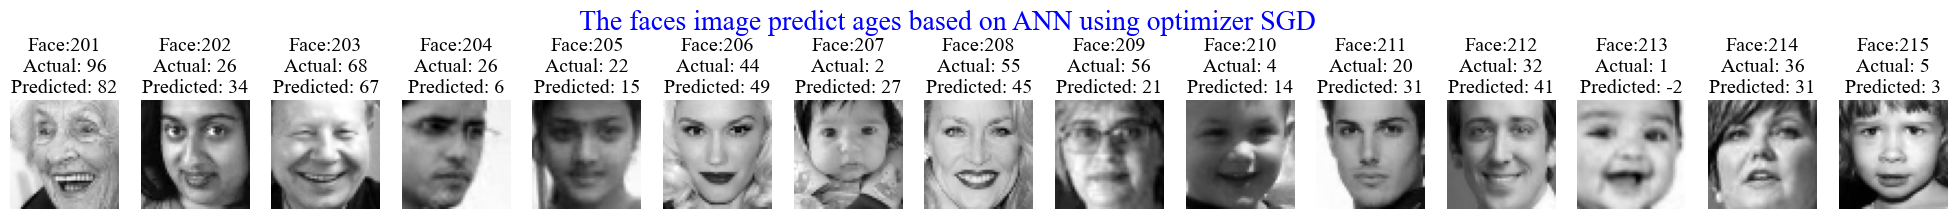

In [51]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_X_test, W_hidden, W_output)


for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(test_y_pred[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict ages based on ANN using optimizer SGD",fontname='TImes New Roman',color='blue',fontsize=20)

### Predicting age based on ANN using optimizer Adam (Original Dataset)
#### parameter: loss=0.01801799930343202,k=50,alpha_init=5e-05,neuron_in_hidden_layer=16,e=84

##### The optimizer used here is Adam, whose update rule is:
##### 
1. $A \Leftarrow  \rho A + (1-\rho) (\nabla w_{output}L)^2 $ 
2. $F \Leftarrow \rho_f F_i + (1 - \rho_f) (\nabla w_{output L})^2 $
3. $\alpha_t = \alpha (\frac{\sqrt{1-p^t}}{1-p^t_f})$
4. $ W_{output} = W_{output} - \frac{\alpha_t}{\sqrt{A}}F $

In [52]:

k = 50
alpha_init = 0.00005
neuron_in_hidden_layer = 16

ann_X_train2 = X_train.copy()
ann_y_age_train = y_ages_train.copy()

ann_X_test2 = X_test.copy()
ann_y_age_test = y_ages_test.copy()

W_hidden = np.random.randn(neuron_in_hidden_layer,ann_X_train2.shape[1]+1)/k
W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

small_value = 1e-8

A_hidden = np.zeros_like(W_hidden)
F_hidden = np.zeros_like(W_hidden)

A_output = np.zeros_like(W_output)
F_output = np.zeros_like(W_output)

rho = 0.999
rho_f = 0.9

for e in range(84):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_X_train2[i:i+1]
        y_i = ann_y_age_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        
        Gradient_output  = -delta_k*x_h_i_1.T

        A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2

        F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)

        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2

        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)

    y_pred,_,_ = predict(ann_X_train2, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_age_test,test_y_pred)
    print(f"{loss=},{e=}")

loss=0.05492083721333957,e=0
loss=0.04699140542930816,e=1
loss=0.03851501838772075,e=2
loss=0.0329484234148182,e=3
loss=0.030106502041550336,e=4
loss=0.028479690912712918,e=5
loss=0.027320936070886957,e=6
loss=0.02634216431822977,e=7
loss=0.025537610464156226,e=8
loss=0.024885289492535316,e=9
loss=0.024334337165385023,e=10
loss=0.02386972015857776,e=11
loss=0.023472841839722702,e=12
loss=0.02307106223775259,e=13
loss=0.022695406466546556,e=14
loss=0.02236262564840638,e=15
loss=0.022075363317580157,e=16
loss=0.021828011059694015,e=17
loss=0.02161184833898293,e=18
loss=0.021422433082880783,e=19
loss=0.021256484570677976,e=20
loss=0.021110084979343007,e=21
loss=0.020979924240825686,e=22
loss=0.02086324949825358,e=23
loss=0.02075774568037078,e=24
loss=0.02066148141885591,e=25
loss=0.020572904088796726,e=26
loss=0.02049087477893502,e=27
loss=0.02041471065809808,e=28
loss=0.020344081679679472,e=29
loss=0.020278786613950325,e=30
loss=0.020218630965721168,e=31
loss=0.02016333774842644,e=32
los

### Visualize the result of predicting age based on ANN using optimizer Adam (Original Dataset)

Text(0.5, 0.98, 'The faces image predict ages based on ANN using optimizer Adam')

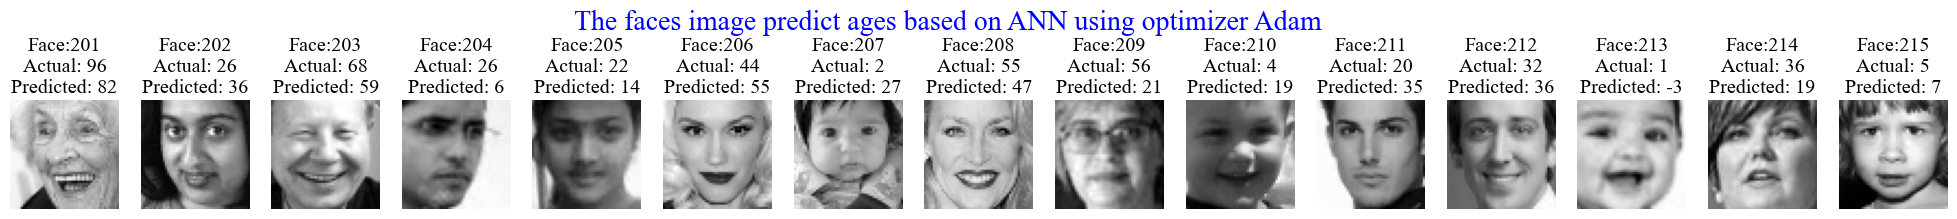

In [53]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_X_test2, W_hidden, W_output)

for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(test_y_pred[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict ages based on ANN using optimizer Adam",fontname='TImes New Roman',color='blue',fontsize=20)

### Predicting gender based on ANN using optimizer SGD (Original Dataset)
#### parameter: loss=0.01801799930343202,k=50,alpha_init=5e-05,neuron_in_hidden_layer=16,e=84


In [54]:

k = 30
learning_rate = 0.002
neuron_in_hidden_layer = 4

ann_X_train3 = X_train.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()

ann_X_test3 = X_test.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()


W_hidden = np.random.randn(neuron_in_hidden_layer,ann_X_train3.shape[1]+1)/k
W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

for e in range(132):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_X_train3[i:i+1]
        y_i = ann_y_genders_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T


        W_output = W_output - learning_rate * Gradient_output



        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        W_hidden = W_hidden - learning_rate * Gradient_hidden


    y_pred,_,_ = predict(ann_X_train3, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_X_test3, W_hidden, W_output)

    loss = mean_squared_error(ann_y_genders_test,test_y_pred)
    print(f"{loss=},{e=}")

loss=0.8872772167433883,e=0
loss=0.7979584645214779,e=1
loss=0.7309039773731996,e=2
loss=0.6940205460812252,e=3
loss=0.6734918467380797,e=4
loss=0.6612787972410316,e=5
loss=0.6535595712537181,e=6
loss=0.6480933345387863,e=7
loss=0.6437057694167259,e=8
loss=0.6398899604673562,e=9
loss=0.6364982111184534,e=10
loss=0.6334857232810976,e=11
loss=0.6307870599332592,e=12
loss=0.628336629127351,e=13
loss=0.6260925420425659,e=14
loss=0.6240320899906674,e=15
loss=0.6221424838094338,e=16
loss=0.6204147904681258,e=17
loss=0.6188404249646311,e=18
loss=0.6174091076770969,e=19
loss=0.6161081607773398,e=20
loss=0.6149231333880001,e=21
loss=0.6138391992928949,e=22
loss=0.6128426459879637,e=23
loss=0.6119220042157805,e=24
loss=0.6110686343405002,e=25
loss=0.6102767852227564,e=26
loss=0.6095432520045255,e=27
loss=0.6088667956230073,e=28
loss=0.608247474721033,e=29
loss=0.6076860055108952,e=30
loss=0.6071832271994662,e=31
loss=0.6067397199842149,e=32
loss=0.6063555964946065,e=33
loss=0.6060304489952107,e=

### Visualize the result of predicting gender based on ANN using optimizer SGD (Original Dataset)

Text(0.5, 0.98, 'The faces image predict gender based on ANN using optimizer SGD (Original Dataset)')

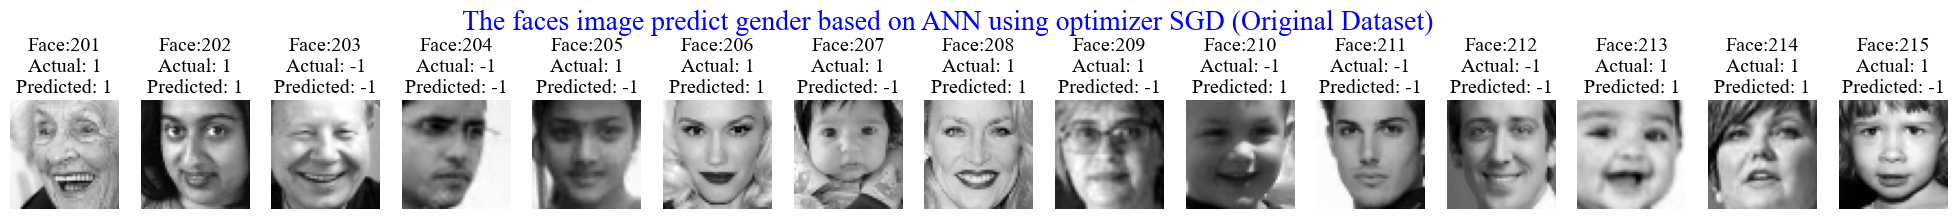

In [55]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_X_test3, W_hidden, W_output)
test_y_pred = test_y_pred.reshape((-1))



for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(ann_y_genders_test[i])}\nPredicted: {int(test_y_pred[i] > 0) * 2 - 1}") 
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict gender based on ANN using optimizer SGD (Original Dataset)",fontname='TImes New Roman',color='blue',fontsize=20)

### Predicting gender based on ANN using optimizer Adam (Original Dataset)
#### parameter: loss=0.5688725434548833,k=50,alpha_init=5e-05,neuron_in_hidden_layer=16,e=98

In [56]:
k = 50
alpha_init = 0.00005
neuron_in_hidden_layer = 16

ann_X_train4 = X_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_X_test4 = X_test.copy()
ann_y_genders_test = y_genders_test.copy()

W_hidden = np.random.randn(neuron_in_hidden_layer,ann_X_train4.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

small_value = 1e-8


A_hidden = np.zeros_like(W_hidden)
F_hidden = np.zeros_like(W_hidden)

A_output = np.zeros_like(W_output)
F_output = np.zeros_like(W_output)

rho = 0.999
rho_f = 0.9



for e in range(98):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_X_train4[i:i+1]
        y_i = ann_y_genders_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2
        F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)
        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
        W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)



        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2
        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)
        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
        W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)



    y_pred,_,_ = predict(ann_X_train4, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_X_test4, W_hidden, W_output)

    loss = mean_squared_error(ann_y_genders_test,test_y_pred)
    print(f"{loss=},{e=}")
    

print(np.mean((ann_y_genders_test < 0 )== (test_y_pred < 0)))

loss=0.9085598889948113,e=0
loss=0.8597109122769817,e=1
loss=0.8108201634893419,e=2
loss=0.7747664706134508,e=3
loss=0.7494374321655733,e=4
loss=0.7303093155716247,e=5
loss=0.714766852381988,e=6
loss=0.7016100991340866,e=7
loss=0.6903440290822326,e=8
loss=0.6807217380279639,e=9
loss=0.6725398545439559,e=10
loss=0.665583571367195,e=11
loss=0.6596360682018912,e=12
loss=0.6545009437363596,e=13
loss=0.650015708527947,e=14
loss=0.6460532635780164,e=15
loss=0.6425164183526572,e=16
loss=0.6393309851760097,e=17
loss=0.6364399872280514,e=18
loss=0.6337990407260485,e=19
loss=0.6313724602606912,e=20
loss=0.6291301435812701,e=21
loss=0.6270456954444181,e=22
loss=0.6250960741490635,e=23
loss=0.6232623709855264,e=24
loss=0.6215307002063792,e=25
loss=0.6198922115327048,e=26
loss=0.6183420258545894,e=27
loss=0.6168776799296743,e=28
loss=0.6154977263174239,e=29
loss=0.6142007546520826,e=30
loss=0.6129848437018353,e=31
loss=0.6118473782304011,e=32
loss=0.6107851156074149,e=33
loss=0.6097943434635427,e=3

### Visualize the result of predicting gender based on ANN using optimizer Adam (Original Dataset)

Text(0.5, 0.98, 'The faces image predict gender based on ANN using optimizer Adam ')

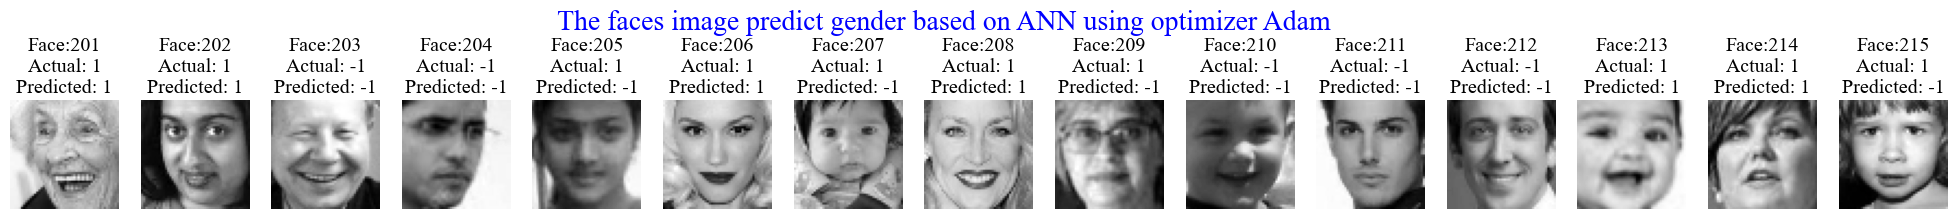

In [57]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_X_test4, W_hidden, W_output)
test_y_pred = test_y_pred.reshape((-1))

for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(ann_y_genders_test[i])}\nPredicted: {int(test_y_pred[i] > 0) * 2 - 1}") 
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict gender based on ANN using optimizer Adam ",fontname='TImes New Roman',color='blue',fontsize=20)

___

# Whittening Dataset
##### Here, the dataset we used have whitened dataset to do ANN

### Predicting age based on ANN using optimizer SGD (Whittening Dataset)
#### parameter: loss=0.026113369249954253,k=50,learning_rate=0.01,neuron_in_hidden_layer=8,e=199

In [58]:

k = 50
learning_rate = 0.01
neuron_in_hidden_layer = 8


Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5

X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))


ann_whitten_X_train = X_train_whitten_reduced.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_whitten_X_test = X_test_whitten_reduced.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()





W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

for e in range(199):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_whitten_X_train[i:i+1]
        y_i = ann_y_age_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        W_output = W_output - learning_rate * Gradient_output

        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule
        W_hidden = W_hidden - learning_rate * Gradient_hidden

    y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_age_test,test_y_pred)

    print(f"{loss=},{e=}")

loss=0.03172452137471938,e=0
loss=0.03170667237336138,e=1
loss=0.03159939521549001,e=2
loss=0.0314794946797436,e=3
loss=0.03134770427375618,e=4
loss=0.031204792478628996,e=5
loss=0.031052671597903272,e=6
loss=0.030894426423454354,e=7
loss=0.03073404898102876,e=8
loss=0.030575903002739817,e=9
loss=0.03042404185767676,e=10
loss=0.030281581430365336,e=11
loss=0.030150315466485722,e=12
loss=0.030030664473675736,e=13
loss=0.029921926217950322,e=14
loss=0.029822704336562,e=15
loss=0.029731362599351857,e=16
loss=0.029646383562894507,e=17
loss=0.029566574708470024,e=18
loss=0.02949112827295761,e=19
loss=0.029419579167447064,e=20
loss=0.029351713821785745,e=21
loss=0.029287471206158756,e=22
loss=0.029226859293102876,e=23
loss=0.029169895190367525,e=24
loss=0.029116568188914536,e=25
loss=0.029066821122363723,e=26
loss=0.029020544671768966,e=27
loss=0.028977579914779433,e=28
loss=0.02893772554629409,e=29
loss=0.028900747314247677,e=30
loss=0.02886638811463707,e=31
loss=0.028834377818882897,e=32
l

### Visualize the result of predicting age based on ANN using optimizer SGD (Whittening Dataset)

Text(0.5, 0.98, 'The faces image predict ages based on ANN using optimizer SGD')

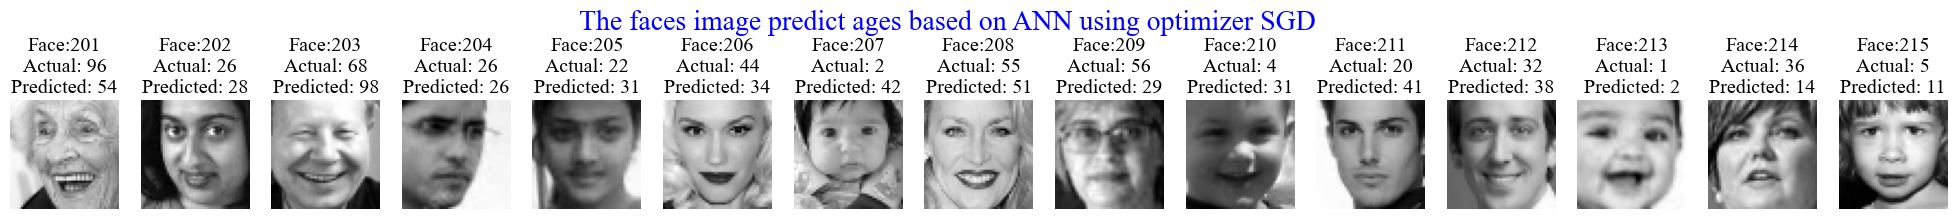

In [59]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)


for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(test_y_pred[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict ages based on ANN using optimizer SGD",fontname='TImes New Roman',color='blue',fontsize=20)

### Predicting age based on ANN using optimizer Adam (Whittening Dataset)
##### loss=0.024469880583371968,k=70,alpha_init=5e-05,neuron_in_hidden_layer=16,e=58

In [60]:

k = 70
alpha_init = 0.00005
neuron_in_hidden_layer = 16



Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5

X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))


ann_whitten_X_train = X_train_whitten_reduced.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_whitten_X_test = X_test_whitten_reduced.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()

W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

small_value = 1e-8

A_hidden = np.zeros_like(W_hidden)
F_hidden = np.zeros_like(W_hidden)

A_output = np.zeros_like(W_output)
F_output = np.zeros_like(W_output)

rho = 0.999
rho_f = 0.9


for e in range(58):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_whitten_X_train[i:i+1]
        y_i = ann_y_age_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2
        F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)
        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
        W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)


        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2
        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)
        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
        W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)


    y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_age_test,test_y_pred)
    print(f"{loss=},{e=}")

loss=0.029365702037837553,e=0
loss=0.029302716303032925,e=1
loss=0.029224589276930602,e=2
loss=0.02914113322641194,e=3
loss=0.029053541873955476,e=4
loss=0.02896155373669422,e=5
loss=0.028864375304983217,e=6
loss=0.028760467104402703,e=7
loss=0.028647583240667362,e=8
loss=0.028523597017863375,e=9
loss=0.028387801142519088,e=10
loss=0.02824151969097644,e=11
loss=0.028087583658310867,e=12
loss=0.02792945152965693,e=13
loss=0.027770578096112095,e=14
loss=0.027613998698614136,e=15
loss=0.027462004453376477,e=16
loss=0.027315995206264283,e=17
loss=0.027176582573935834,e=18
loss=0.027043857052498094,e=19
loss=0.026917680462909523,e=20
loss=0.02679791131053536,e=21
loss=0.02668450251638136,e=22
loss=0.02657743477960104,e=23
loss=0.026476558986044958,e=24
loss=0.026381494685882644,e=25
loss=0.026291643785490187,e=26
loss=0.026206279420693836,e=27
loss=0.026124659208222867,e=28
loss=0.02604613543479271,e=29
loss=0.02597024812831992,e=30
loss=0.02589679070961852,e=31
loss=0.02582583961862173,e=3

### Visualize the result of predicting age based on ANN using optimizer Adam (Whittening Dataset)

Text(0.5, 0.98, 'The faces image predict ages based on ANN using optimizer Adam')

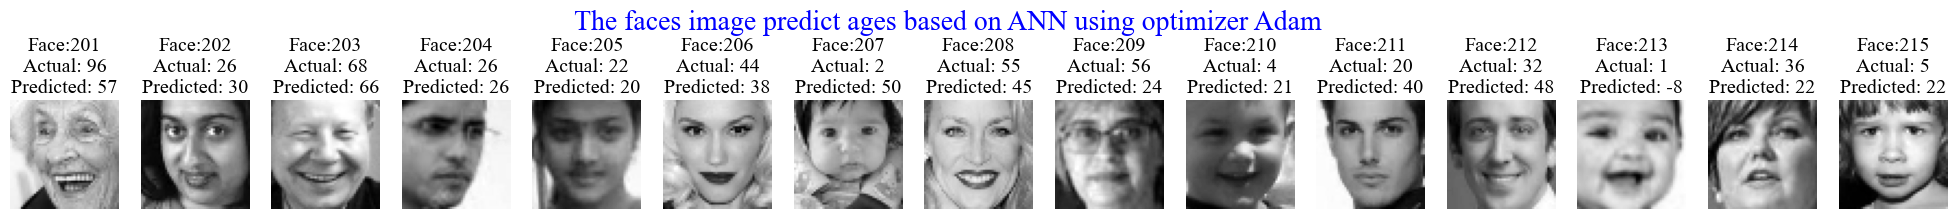

In [61]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)


for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(test_y_pred[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict ages based on ANN using optimizer Adam",fontname='TImes New Roman',color='blue',fontsize=20)    


### Predicting gender based on ANN using optimizer SGD (Whittening Dataset)
loss=0.6753249620801155,k=70,learning_rate=0.01,neuron_in_hidden_layer=16,e=7

In [62]:

k = 70
learning_rate = 0.01
neuron_in_hidden_layer = 16


Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5

X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))


ann_whitten_X_train = X_train_whitten_reduced.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_whitten_X_test = X_test_whitten_reduced.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()


W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer


for e in range(7):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_whitten_X_train[i:i+1]
        y_i = ann_y_genders_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T


        W_output = W_output - learning_rate * Gradient_output

        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        W_hidden = W_hidden - learning_rate * Gradient_hidden


    y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_genders_test,test_y_pred)
    print(f"{loss=},{e=}")
    


loss=0.7057355928303689,e=0
loss=0.6971385956898912,e=1
loss=0.6927746773815048,e=2
loss=0.6888206879399886,e=3
loss=0.6847375078902509,e=4
loss=0.6808032628247562,e=5
loss=0.6774399314535187,e=6


### Visualize the result of predicting gender based on ANN using optimizer SGD (Whittening Dataset)

Text(0.5, 0.98, 'The faces image predict gender based on ANN using optimizer SGD')

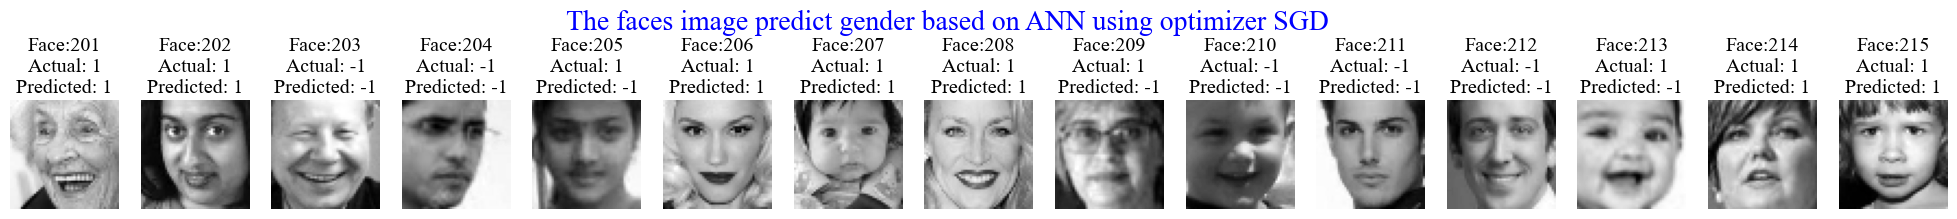

In [63]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
test_y_pred = test_y_pred.reshape((-1))

for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(ann_y_genders_test[i])}\nPredicted: {int(test_y_pred[i] > 0) * 2 - 1}") 
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict gender based on ANN using optimizer SGD",fontname='TImes New Roman',color='blue',fontsize=20)

### Predicting gender based on ANN using optimizer Adam (Whittening Dataset)
#### parameter: loss=0.663820053580194,k=70,alpha_init=0.0001,neuron_in_hidden_layer=16,e=26

In [64]:
k = 70
alpha_init = 0.0001
neuron_in_hidden_layer = 16

Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5

X_train_whitten_reduced = X_train_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))
X_test_whitten_reduced = X_test_demean @ PT1.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr1[:k]))


ann_whitten_X_train = X_train_whitten_reduced.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_whitten_X_test = X_test_whitten_reduced.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()





W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

small_value = 1e-8


A_hidden = np.zeros_like(W_hidden)
F_hidden = np.zeros_like(W_hidden)

A_output = np.zeros_like(W_output)
F_output = np.zeros_like(W_output)

rho = 0.999
rho_f = 0.9



for e in range(26):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_whitten_X_train[i:i+1]
        y_i = ann_y_genders_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2

        F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)



        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2

        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)

    y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_genders_test,test_y_pred)
    print(f"{loss=},{e=}")
    


loss=0.689909348894413,e=0
loss=0.6902751728654569,e=1
loss=0.690451898143993,e=2
loss=0.6900860611290417,e=3
loss=0.6893705098735884,e=4
loss=0.6881334842606226,e=5
loss=0.6863559560359652,e=6
loss=0.6842841661675835,e=7
loss=0.6822579490841334,e=8
loss=0.6805228334554057,e=9
loss=0.6791731416895649,e=10
loss=0.6781979746595553,e=11
loss=0.6775370690218545,e=12
loss=0.677126635221507,e=13
loss=0.6769208643932002,e=14
loss=0.6768903107996549,e=15
loss=0.677010183686099,e=16
loss=0.6772420170266157,e=17
loss=0.6775347185489851,e=18
loss=0.6778467250755387,e=19
loss=0.6781512552099231,e=20
loss=0.6784290575198875,e=21
loss=0.6786670352557648,e=22
loss=0.6788585301394732,e=23
loss=0.6790010876931533,e=24
loss=0.6790975113132879,e=25


### Visualize the result of predicting gender based on ANN using optimizer Adam (Whittening Dataset)

0.7533265097236438


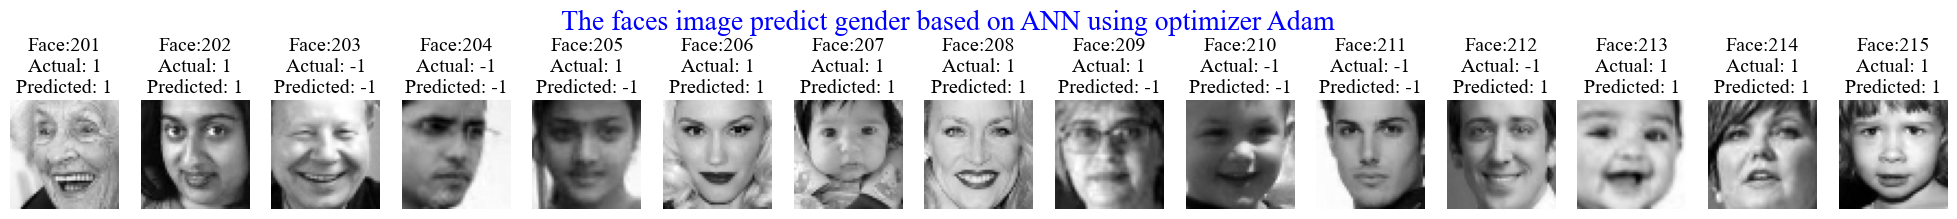

In [65]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
test_y_pred = test_y_pred.reshape((-1))

for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(ann_y_genders_test[i])}\nPredicted: {int(test_y_pred[i] > 0) * 2 - 1}") 
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict gender based on ANN using optimizer Adam",fontname='TImes New Roman',color='blue',fontsize=20)
print(np.mean((ann_y_genders_test < 0 )== (test_y_pred < 0)))

## a) Adaptive Learning Rate:

##### SGD: Uses a fixed learning rate or predefined learning rate decay strategy.
##### Adam: Adaptively adjusts the learning rate for each parameter based on first and second moment estimates.

## b) Convergence Speed:

##### SGD: Generally converges slower, especially when dealing with sparse gradients or non-stationary objectives.
##### Adam: Usually converges faster, particularly in the early stages of training.

## c) Parameter Updates:

##### SGD: Directly uses gradients to update parameters.
##### Adam: Uses exponential moving averages of gradients and squared gradients to update parameters.

## d) Memory Requirements and Computational Complexity:

##### SGD: Lower memory requirements, only needs to store current gradients. Besides that, it requires less computational cost per iteration.
##### Adam: Requires additional memory to store first and second moment estimates for each parameter. Besides that, it requires additional computations per iteration to update momentum and adaptive learning rates. 

## e) Hyperparameter Tuning:

##### SGD: Requires more careful tuning of the learning rate.
##### Adam: Less sensitive to initial learning rate.

### Conclusion: Adam achieves faster convergence through adaptive learning rates and momentum, is less sensitive to hyperparameters, and is suitable for various problems
